### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Load dataset

In [3]:
air = pd.read_csv('GlobalWeatherRepo.csv') 

### Data inspection

In [4]:
# Initial inspection
print("Dataset Shape:", air.shape)

Dataset Shape: (62363, 41)


In [5]:
print("\nColumn Names and Data Types:\n", air.dtypes)


Column Names and Data Types:
 country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index 

In [6]:
print("\nFirst 5 Rows:\n", air.head())


First 5 Rows:
        country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.

In [7]:
air.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [8]:
air.tail()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
62358,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1743584400,2025-04-02 05:00,25.0,77.0,Partly cloudy,...,10.545,11.840,1,1,06:24 AM,06:38 PM,09:55 AM,11:11 PM,Waxing Crescent,19
62359,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1743584400,2025-04-02 16:00,25.0,77.0,Sunny,...,236.060,245.495,5,10,05:49 AM,06:11 PM,08:32 AM,10:33 PM,Waxing Crescent,15
62360,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1743584400,2025-04-02 12:00,22.8,73.1,Sunny,...,22.200,208.865,2,2,05:58 AM,06:16 PM,09:01 AM,10:38 PM,Waxing Crescent,17
62361,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1743584400,2025-04-02 11:00,25.7,78.2,Patchy rain nearby,...,4.995,5.735,1,1,06:12 AM,06:08 PM,10:13 AM,09:36 PM,Waxing Crescent,17
62362,Zimbabwe,Harare,-17.8178,31.0447,Africa/Harare,1743584400,2025-04-02 11:00,26.4,79.5,Sunny,...,11.655,13.135,1,1,06:02 AM,05:56 PM,10:07 AM,09:18 PM,Waxing Crescent,17


In [9]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62363 entries, 0 to 62362
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       62363 non-null  object 
 1   location_name                 62363 non-null  object 
 2   latitude                      62363 non-null  float64
 3   longitude                     62363 non-null  float64
 4   timezone                      62363 non-null  object 
 5   last_updated_epoch            62363 non-null  int64  
 6   last_updated                  62363 non-null  object 
 7   temperature_celsius           62363 non-null  float64
 8   temperature_fahrenheit        62363 non-null  float64
 9   condition_text                62363 non-null  object 
 10  wind_mph                      62363 non-null  float64
 11  wind_kph                      62363 non-null  float64
 12  wind_degree                   62363 non-null  int64  
 13  w

In [10]:
air.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,62363.000000,62363.000000,6.236300e+04,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,...,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000
mean,19.135189,22.180023,1.729746e+09,22.116372,71.811064,8.288908,13.343600,168.837468,1014.155541,29.947399,...,19.078428,528.676275,63.634256,15.210747,11.442181,25.686801,51.898200,1.735869,2.728926,48.981239
std,24.475089,65.818563,8.051186e+06,9.602284,17.283909,9.113311,14.664599,103.726299,13.347983,0.394146,...,16.533252,930.067976,35.923511,26.371990,47.976399,44.260055,159.841783,0.993914,2.603333,35.103497
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.722861e+09,16.600000,61.800000,4.000000,6.500000,80.000000,1010.000000,29.830000,...,10.800000,227.000000,39.300000,0.925000,0.740000,5.800000,9.065000,1.000000,1.000000,14.000000
50%,17.250000,23.316700,1.729761e+09,25.000000,76.900000,6.900000,11.200000,160.000000,1013.000000,29.920000,...,16.600000,329.184000,61.000000,3.515000,2.400000,13.875000,21.090000,1.000000,2.000000,49.000000
75%,40.400000,50.580000,1.736721e+09,28.400000,83.100000,11.400000,18.400000,256.000000,1018.000000,30.050000,...,25.300000,510.600000,83.000000,16.725000,9.065000,30.155000,46.250000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.743584e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


### Handling Redundant/Irrelevant columns

In [11]:
# Drop irrelevant columns and the British index for this notebook
columns_to_drop = ['last_updated_epoch', 'location_name', 'country', 'air_quality_gb-defra-index']
air = air.drop(columns=columns_to_drop)

# Verify the remaining columns
print("Remaining Columns:", air.columns.tolist())
print("New Shape:", air.shape)

Remaining Columns: ['latitude', 'longitude', 'timezone', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']
New Shape: (62363, 37)


In [12]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62363 entries, 0 to 62362
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      62363 non-null  float64
 1   longitude                     62363 non-null  float64
 2   timezone                      62363 non-null  object 
 3   last_updated                  62363 non-null  object 
 4   temperature_celsius           62363 non-null  float64
 5   temperature_fahrenheit        62363 non-null  float64
 6   condition_text                62363 non-null  object 
 7   wind_mph                      62363 non-null  float64
 8   wind_kph                      62363 non-null  float64
 9   wind_degree                   62363 non-null  int64  
 10  wind_direction                62363 non-null  object 
 11  pressure_mb                   62363 non-null  float64
 12  pressure_in                   62363 non-null  float64
 13  p

In [13]:
# Drop redundant and irrelevant columns
columns_to_drop = [
    'timezone', 'last_updated', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',  # Temporal
    'temperature_fahrenheit', 'feels_like_fahrenheit',  # Redundant temperature units
    'wind_kph', 'gust_kph', 'wind_direction',  # Redundant wind units and direction
    'pressure_in', 'precip_in', 'visibility_miles'  # Redundant units
]

air = air.drop(columns=columns_to_drop)

# Verify the remaining columns
print("Remaining Columns:", air.columns.tolist())
print("New Shape:", air.shape)

Remaining Columns: ['latitude', 'longitude', 'temperature_celsius', 'condition_text', 'wind_mph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index']
New Shape: (62363, 21)


In [14]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62363 entries, 0 to 62362
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      62363 non-null  float64
 1   longitude                     62363 non-null  float64
 2   temperature_celsius           62363 non-null  float64
 3   condition_text                62363 non-null  object 
 4   wind_mph                      62363 non-null  float64
 5   wind_degree                   62363 non-null  int64  
 6   pressure_mb                   62363 non-null  float64
 7   precip_mm                     62363 non-null  float64
 8   humidity                      62363 non-null  int64  
 9   cloud                         62363 non-null  int64  
 10  feels_like_celsius            62363 non-null  float64
 11  visibility_km                 62363 non-null  float64
 12  uv_index                      62363 non-null  float64
 13  g

## EDA

C:\Users\USER\AppData\Local\Temp\ipykernel_9812\180452273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='air_quality_us-epa-index', data=air, palette='viridis')


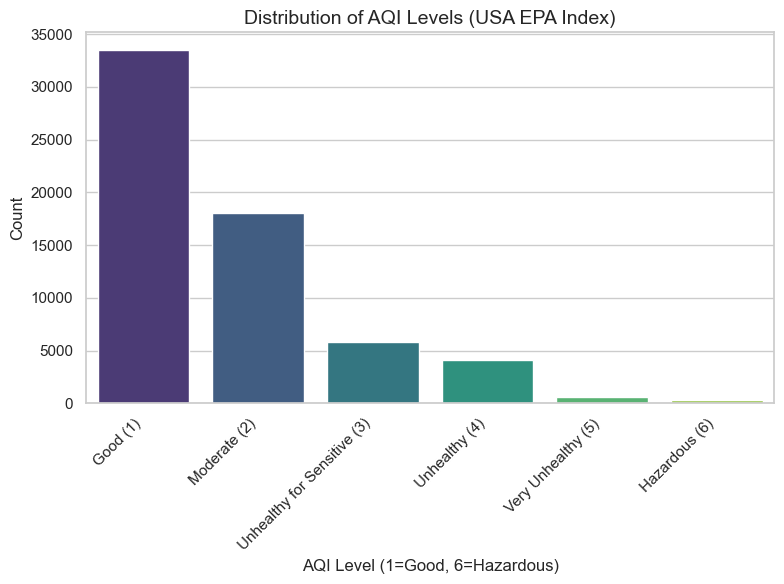

In [15]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='air_quality_us-epa-index', data=air, palette='viridis')
plt.title('Distribution of AQI Levels (USA EPA Index)', fontsize=14)
plt.xlabel('AQI Level (1=Good, 6=Hazardous)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(6), labels=['Good (1)', 'Moderate (2)', 'Unhealthy for Sensitive (3)', 
                                   'Unhealthy (4)', 'Very Unhealthy (5)', 'Hazardous (6)'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Calculate the percentage of each class
class_counts = air['air_quality_us-epa-index'].value_counts(normalize=True) * 100
print("Percentage of Each AQI Level:\n", class_counts.sort_index())

Percentage of Each AQI Level:
 air_quality_us-epa-index
1    53.711335
2    28.959479
3     9.279541
4     6.617706
5     0.944470
6     0.487469
Name: proportion, dtype: float64


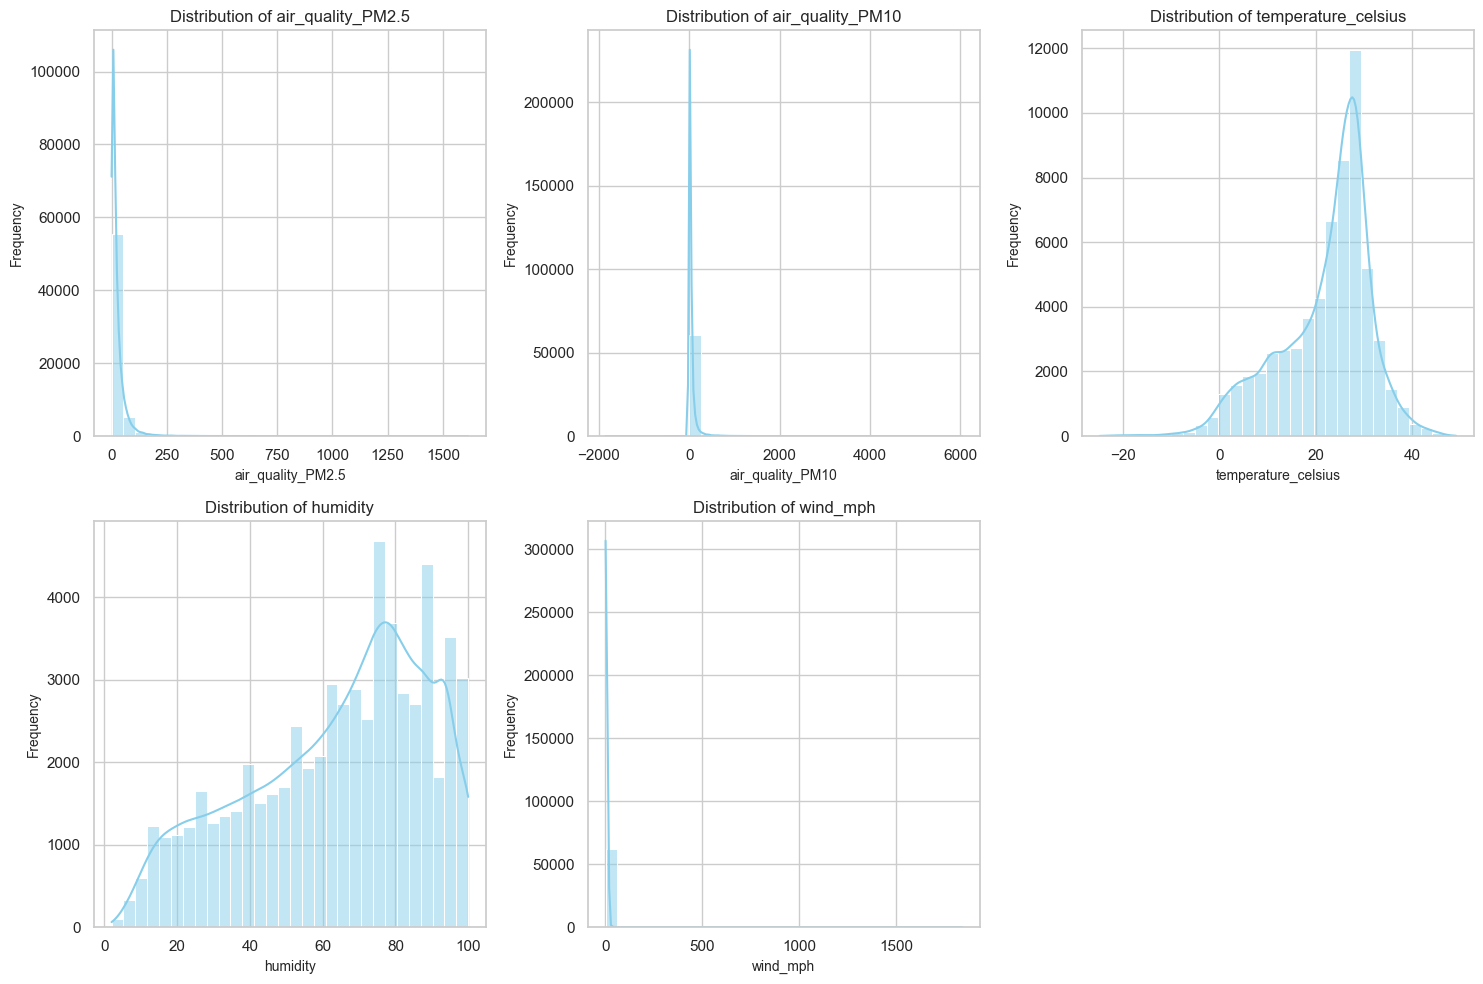

In [17]:
# Select key numerical features for visualization
key_numerical_cols = ['air_quality_PM2.5', 'air_quality_PM10', 'temperature_celsius', 'humidity', 'wind_mph']

# Plot histograms for key numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(air[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9812\633467951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='air_quality_us-epa-index', y=col, data=air, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_9812\633467951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='air_quality_us-epa-index', y=col, data=air, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_9812\633467951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='air_quality_us-epa-index', y=col, data=air, palette='viridis')
C:\Users\USER\AppDa

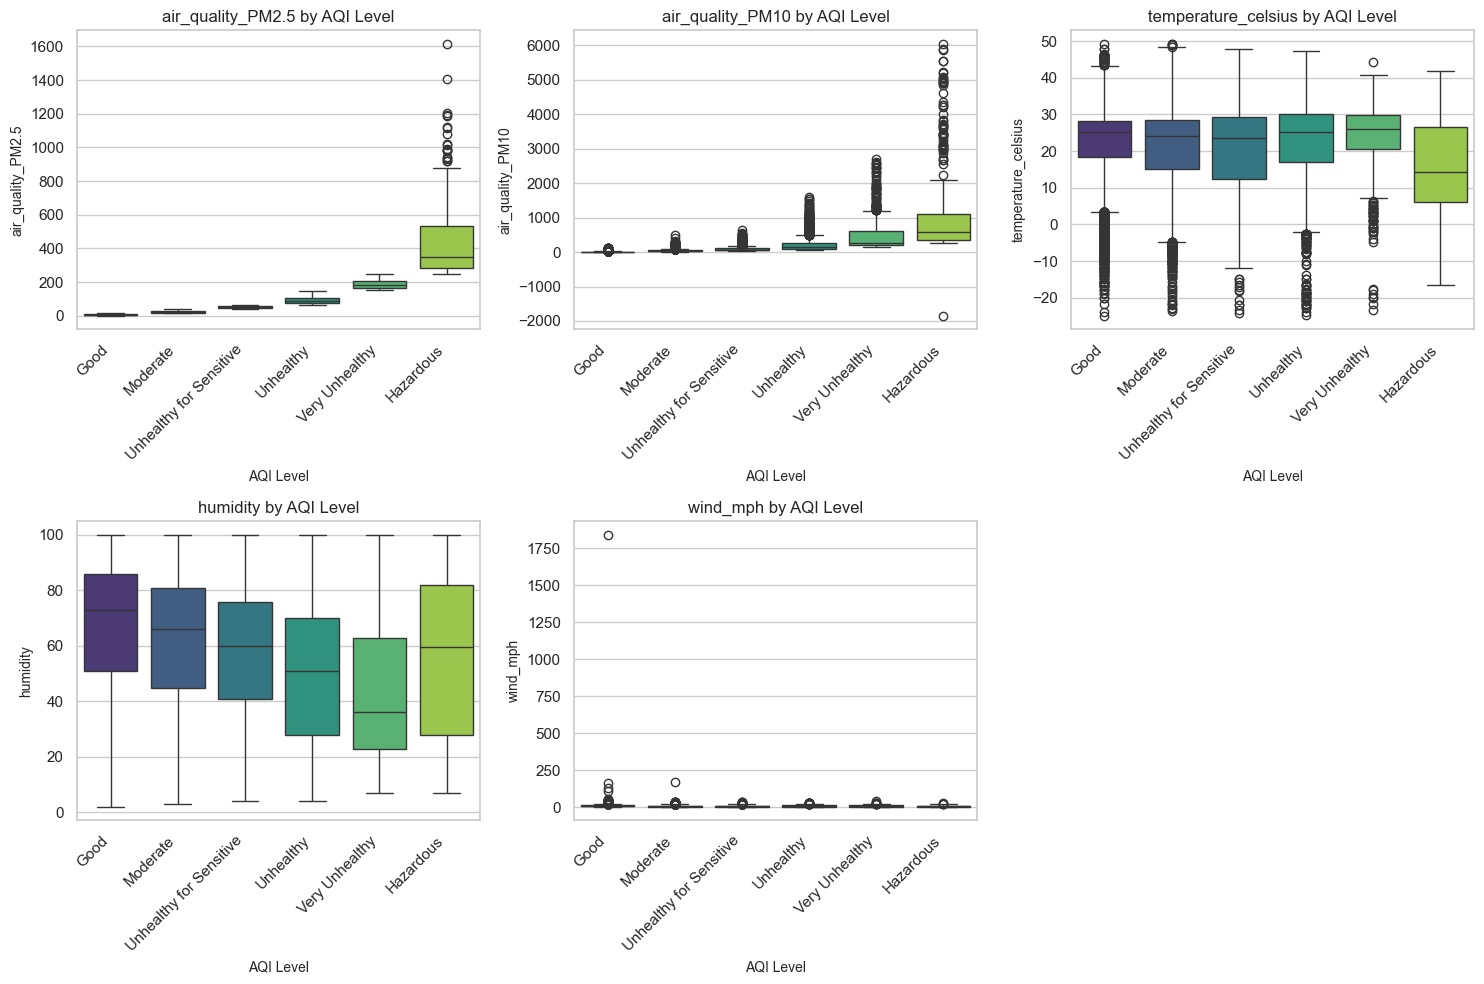

In [18]:
# Plot box plots of key features by AQI level
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='air_quality_us-epa-index', y=col, data=air, palette='viridis')
    plt.title(f'{col} by AQI Level', fontsize=12)
    plt.xlabel('AQI Level', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.xticks(ticks=range(6), labels=['Good', 'Moderate', 'Unhealthy for Sensitive', 
                                       'Unhealthy', 'Very Unhealthy', 'Hazardous'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

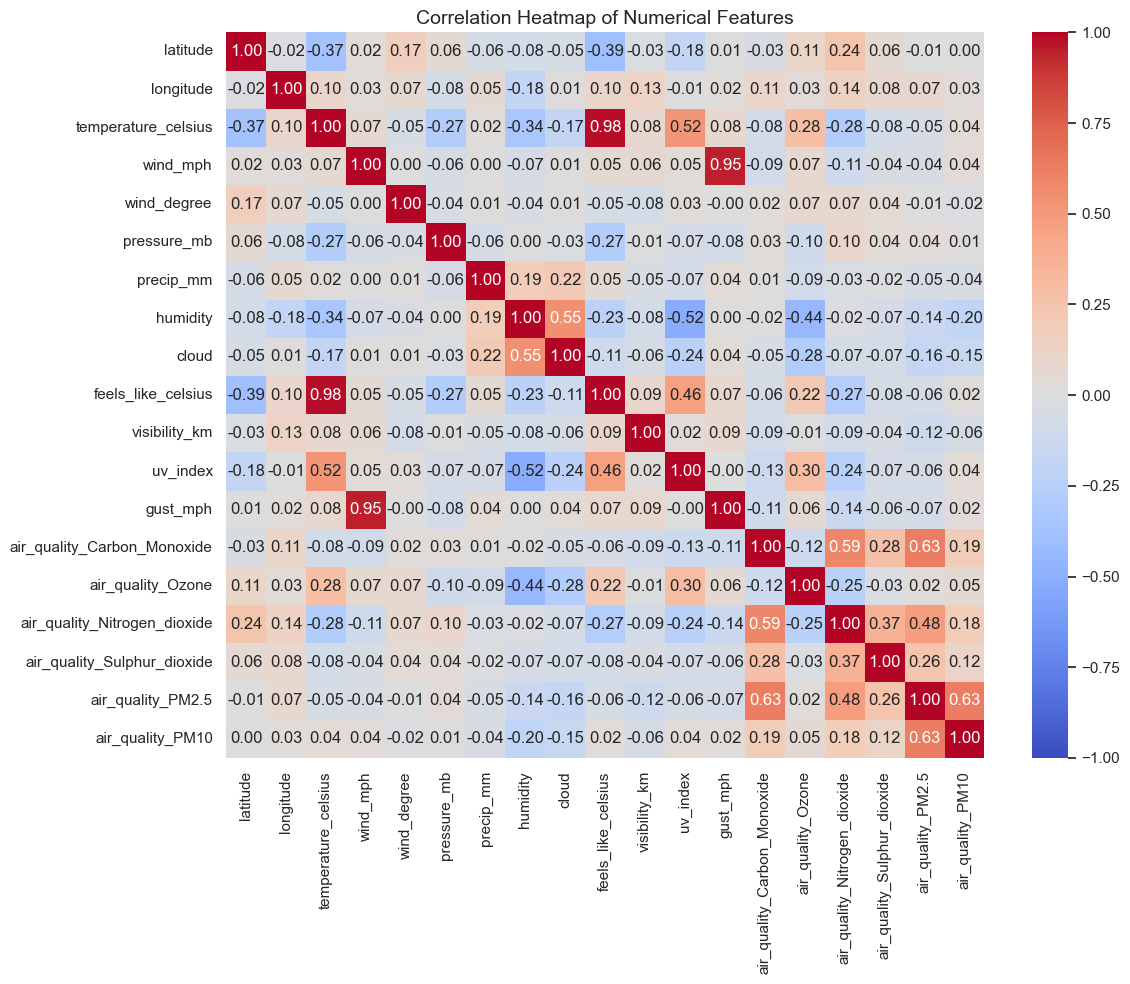

In [19]:
# Calculate correlation matrix for numerical features
numerical_features = air.select_dtypes(include=['float64', 'int64']).columns.drop('air_quality_us-epa-index')
correlation_matrix = air[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

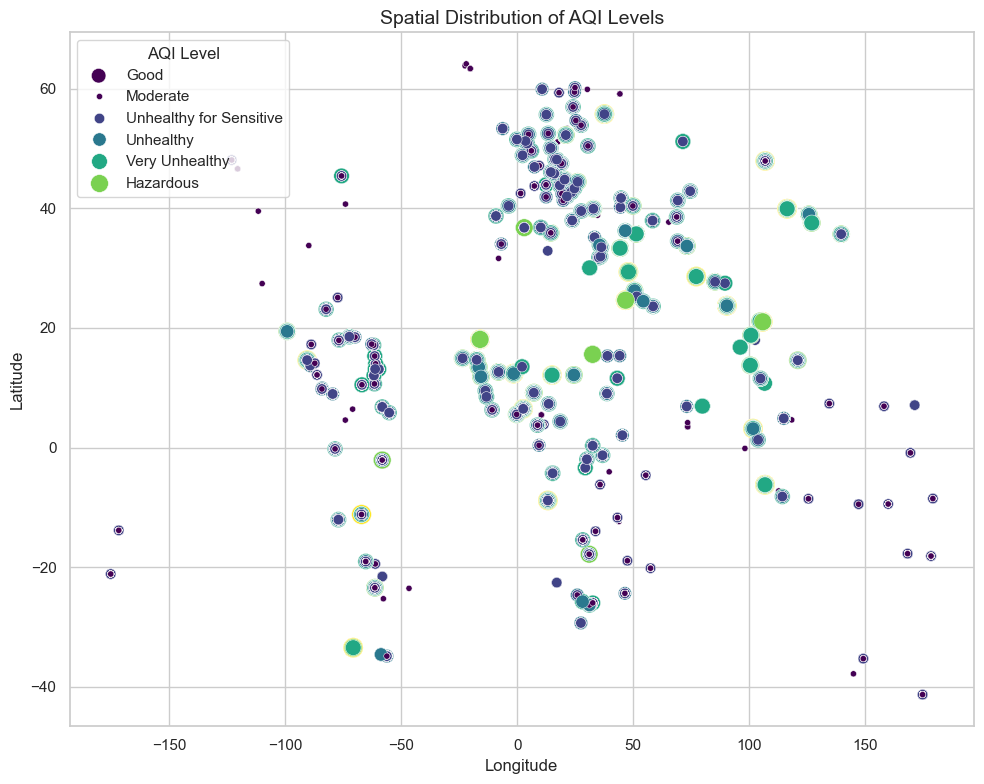

In [22]:
# Plot AQI levels on a scatter plot with latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='air_quality_us-epa-index', size='air_quality_us-epa-index', 
                data=air, palette='viridis', sizes=(20, 200))
plt.title('Spatial Distribution of AQI Levels', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='AQI Level', labels=['Good', 'Moderate', 'Unhealthy for Sensitive', 
                                      'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.tight_layout()
plt.show()

### Handling Outliers

In [23]:
# Define numerical features (excluding the target)
numerical_cols = [
    'latitude', 'longitude', 'temperature_celsius', 'wind_mph', 'wind_degree',
    'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius',
    'visibility_km', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide',
    'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10'
]

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Detect and summarize outliers for each numerical feature
outlier_summary = {}
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(air, col)
    outlier_summary[col] = {
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': (len(outliers) / len(air)) * 100,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

# Print outlier summary
print("Outlier Summary for Numerical Features:")
for col, summary in outlier_summary.items():
    print(f"{col}:")
    print(f"  Number of Outliers: {summary['Number of Outliers']}")
    print(f"  Percentage of Outliers: {summary['Percentage of Outliers']:.2f}%")
    print(f"  Lower Bound: {summary['Lower Bound']:.2f}")
    print(f"  Upper Bound: {summary['Upper Bound']:.2f}\n")

Outlier Summary for Numerical Features:
latitude:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -51.22
  Upper Bound: 95.38

longitude:
  Number of Outliers: 4798
  Percentage of Outliers: 7.69%
  Lower Bound: -92.96
  Upper Bound: 136.70

temperature_celsius:
  Number of Outliers: 1064
  Percentage of Outliers: 1.71%
  Lower Bound: -1.10
  Upper Bound: 46.10

wind_mph:
  Number of Outliers: 944
  Percentage of Outliers: 1.51%
  Lower Bound: -7.10
  Upper Bound: 22.50

wind_degree:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -184.00
  Upper Bound: 520.00

pressure_mb:
  Number of Outliers: 2345
  Percentage of Outliers: 3.76%
  Lower Bound: 998.00
  Upper Bound: 1030.00

precip_mm:
  Number of Outliers: 11692
  Percentage of Outliers: 18.75%
  Lower Bound: -0.04
  Upper Bound: 0.07

humidity:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -9.50
  Upper Bound: 138.50

cloud:
  Number of Outliers: 0
  Percentage 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns (excluding the target)
numerical_cols = [
    'latitude', 'longitude', 'temperature_celsius', 'wind_mph', 'wind_degree',
    'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius',
    'visibility_km', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide',
    'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10'
]

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Function to winsorize (cap) outliers
def winsorize(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = data[column].quantile(lower_percentile)
    upper_limit = data[column].quantile(upper_percentile)
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)

Number of Negative Values After Capping:
air_quality_Carbon_Monoxide: 0
air_quality_Ozone: 0
air_quality_Nitrogen_dioxide: 0
air_quality_Sulphur_dioxide: 0
air_quality_PM2.5: 0
air_quality_PM10: 0


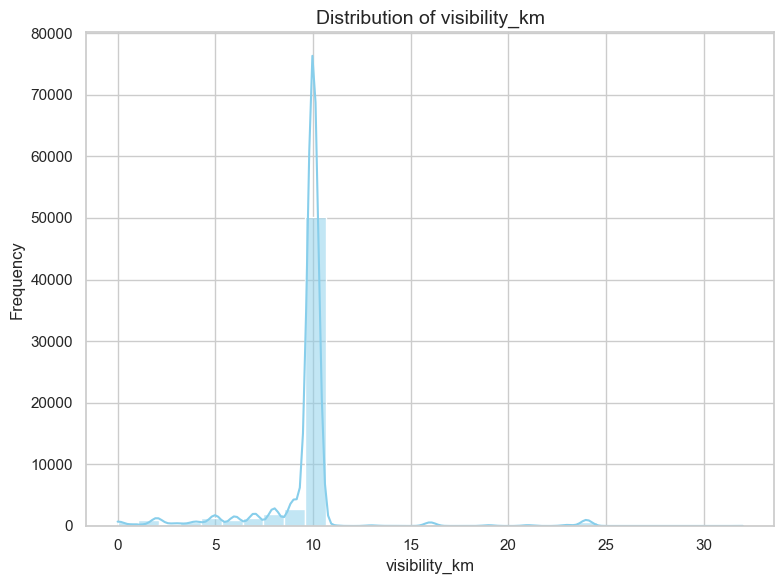

Outlier Summary After Adjusted Winsorization:
latitude:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

longitude:
  Number of Outliers: 3526
  Percentage of Outliers: 5.65%

temperature_celsius:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

wind_mph:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

wind_degree:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

pressure_mb:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

precip_mm:
  Number of Outliers: 11692
  Percentage of Outliers: 18.75%

humidity:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

cloud:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

feels_like_celsius:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

visibility_km:
  Number of Outliers: 12170
  Percentage of Outliers: 19.51%

uv_index:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

gust_mph:
  Number of Outliers: 0
  Percentage of Outliers: 0.00%

air_quality_Carbon_Monoxide:
  Number o

In [25]:
# Step 1: Cap negative values for pollutant features
pollutant_cols = [
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10'
]
for col in pollutant_cols:
    air[col] = air[col].clip(lower=0)

# Verify no negative values remain
print("Number of Negative Values After Capping:")
for col in pollutant_cols:
    print(f"{col}: {(air[col] < 0).sum()}")

# Step 2: Visualize the distribution of visibility_km to understand its outliers
plt.figure(figsize=(8, 6))
sns.histplot(air['visibility_km'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of visibility_km', fontsize=14)
plt.xlabel('visibility_km', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Step 3: Apply winsorization to numerical features (excluding precip_mm and visibility_km)
numerical_cols_to_winsorize = [col for col in numerical_cols if col not in ['precip_mm', 'visibility_km']]
for col in numerical_cols_to_winsorize:
    winsorize(air, col)

# Step 4: Reapply IQR detection to confirm reduction in outliers
outlier_summary_after = {}
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(air, col)
    outlier_summary_after[col] = {
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': (len(outliers) / len(air)) * 100
    }

# Print updated outlier summary
print("Outlier Summary After Adjusted Winsorization:")
for col, summary in outlier_summary_after.items():
    print(f"{col}:")
    print(f"  Number of Outliers: {summary['Number of Outliers']}")
    print(f"  Percentage of Outliers: {summary['Percentage of Outliers']:.2f}%\n")

### Handling Skewness

Skewness of Numerical Features:
latitude: -0.24
longitude: 0.10
temperature_celsius: -0.75
wind_mph: 0.65
wind_degree: 0.17
pressure_mb: 0.45
precip_mm: 19.11
humidity: -0.47
cloud: 0.24
feels_like_celsius: -0.72
visibility_km: 1.21
uv_index: 0.33
gust_mph: 0.67
air_quality_Carbon_Monoxide: 1.88
air_quality_Ozone: 0.27
air_quality_Nitrogen_dioxide: 1.79
air_quality_Sulphur_dioxide: 2.20
air_quality_PM2.5: 1.44
air_quality_PM10: 1.84


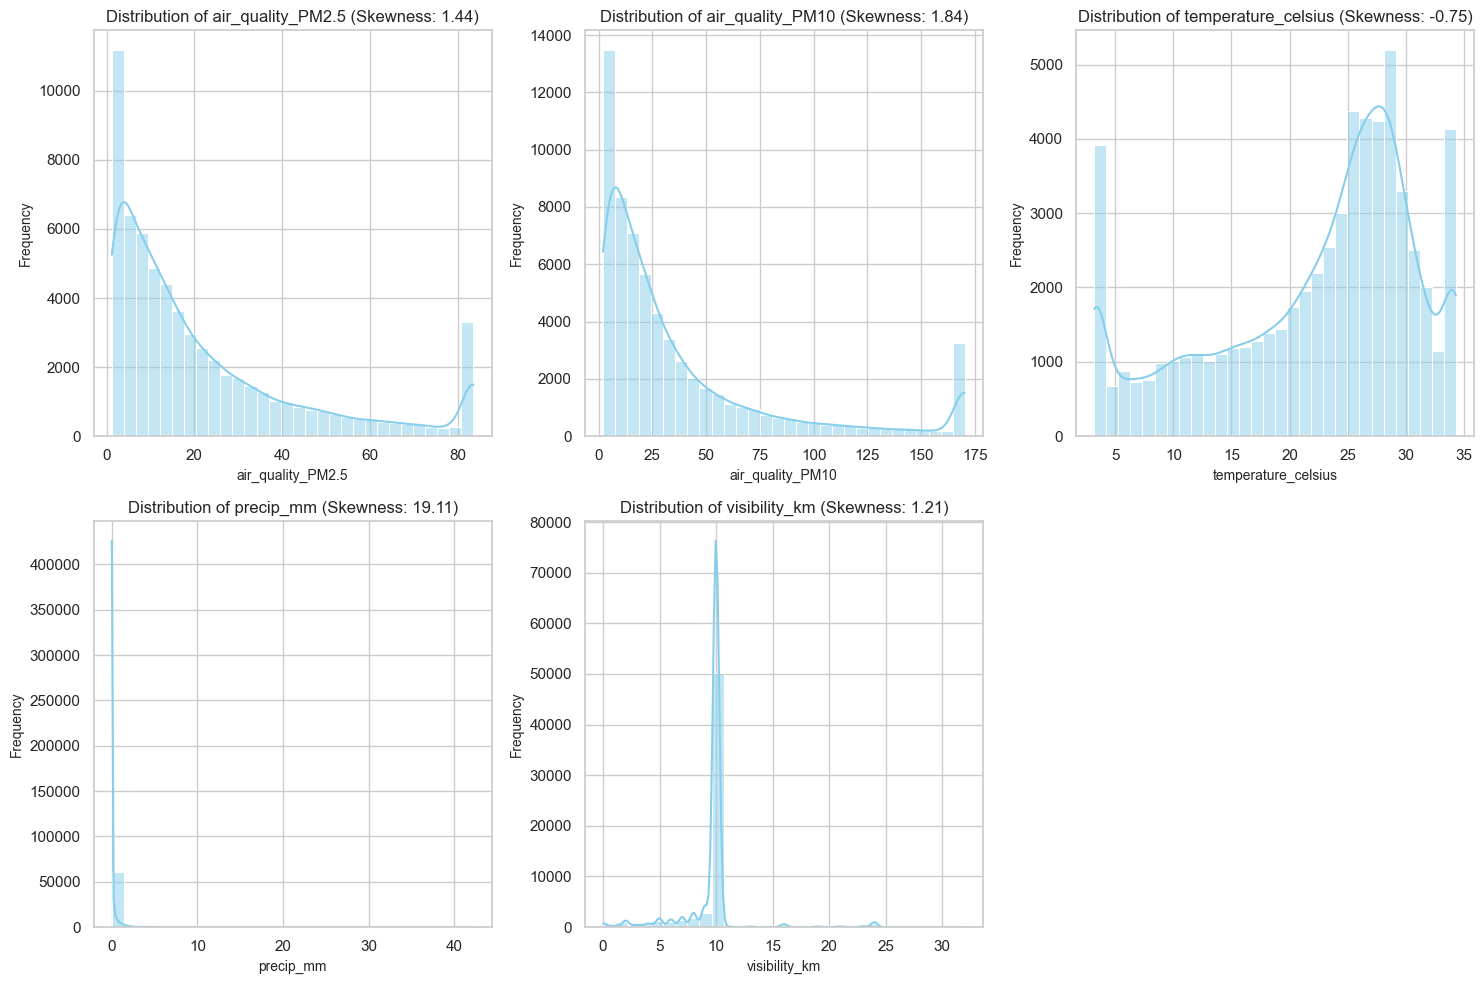

In [26]:
from scipy.stats import skew

# Calculate skewness for numerical features
skewness = air[numerical_cols].apply(skew)
print("Skewness of Numerical Features:")
for col, sk in skewness.items():
    print(f"{col}: {sk:.2f}")

# Plot distributions for key features to visualize skewness
key_skew_cols = ['air_quality_PM2.5', 'air_quality_PM10', 'temperature_celsius', 'precip_mm', 'visibility_km']
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_skew_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(air[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col} (Skewness: {skew(air[col]):.2f})', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import skew

# Function to apply log transformation (handles zeros by adding a small constant)
def log_transform(data, column):
    # Ensure all values are positive by adding a small constant
    min_val = data[column].min()
    if min_val <= 0:
        constant = abs(min_val) + 1e-6
    else:
        constant = 0
    data[f'{column}_log'] = np.log1p(data[column] + constant)

# Apply log transformation to right-skewed features (skewness > 1)
skewed_cols = [
    'precip_mm', 'air_quality_Sulphur_dioxide', 'air_quality_Carbon_Monoxide',
    'air_quality_PM10', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5',
    'visibility_km'
]
for col in skewed_cols:
    log_transform(air, col)

# Calculate skewness after transformation
transformed_cols = [f'{col}_log' for col in skewed_cols]
skewness_after = air[transformed_cols].apply(skew)
print("Skewness After Log Transformation:")
for col, sk in skewness_after.items():
    print(f"{col}: {sk:.2f}")

# Drop original skewed columns and rename transformed columns
for col in skewed_cols:
    air = air.drop(columns=[col])
    air = air.rename(columns={f'{col}_log': col})

Skewness After Log Transformation:
precip_mm_log: 4.20
air_quality_Sulphur_dioxide_log: 0.75
air_quality_Carbon_Monoxide_log: 0.76
air_quality_PM10_log: 0.04
air_quality_Nitrogen_dioxide_log: 0.47
air_quality_PM2.5_log: -0.10
visibility_km_log: -3.80


C:\Users\USER\AppData\Local\Temp\ipykernel_9812\1389671986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='air_quality_us-epa-index', y=col, data=air, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_9812\1389671986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='air_quality_us-epa-index', y=col, data=air, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_9812\1389671986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='air_quality_us-epa-index', y=col, data=air, palette='viridis')
C:\Users\USER\Ap

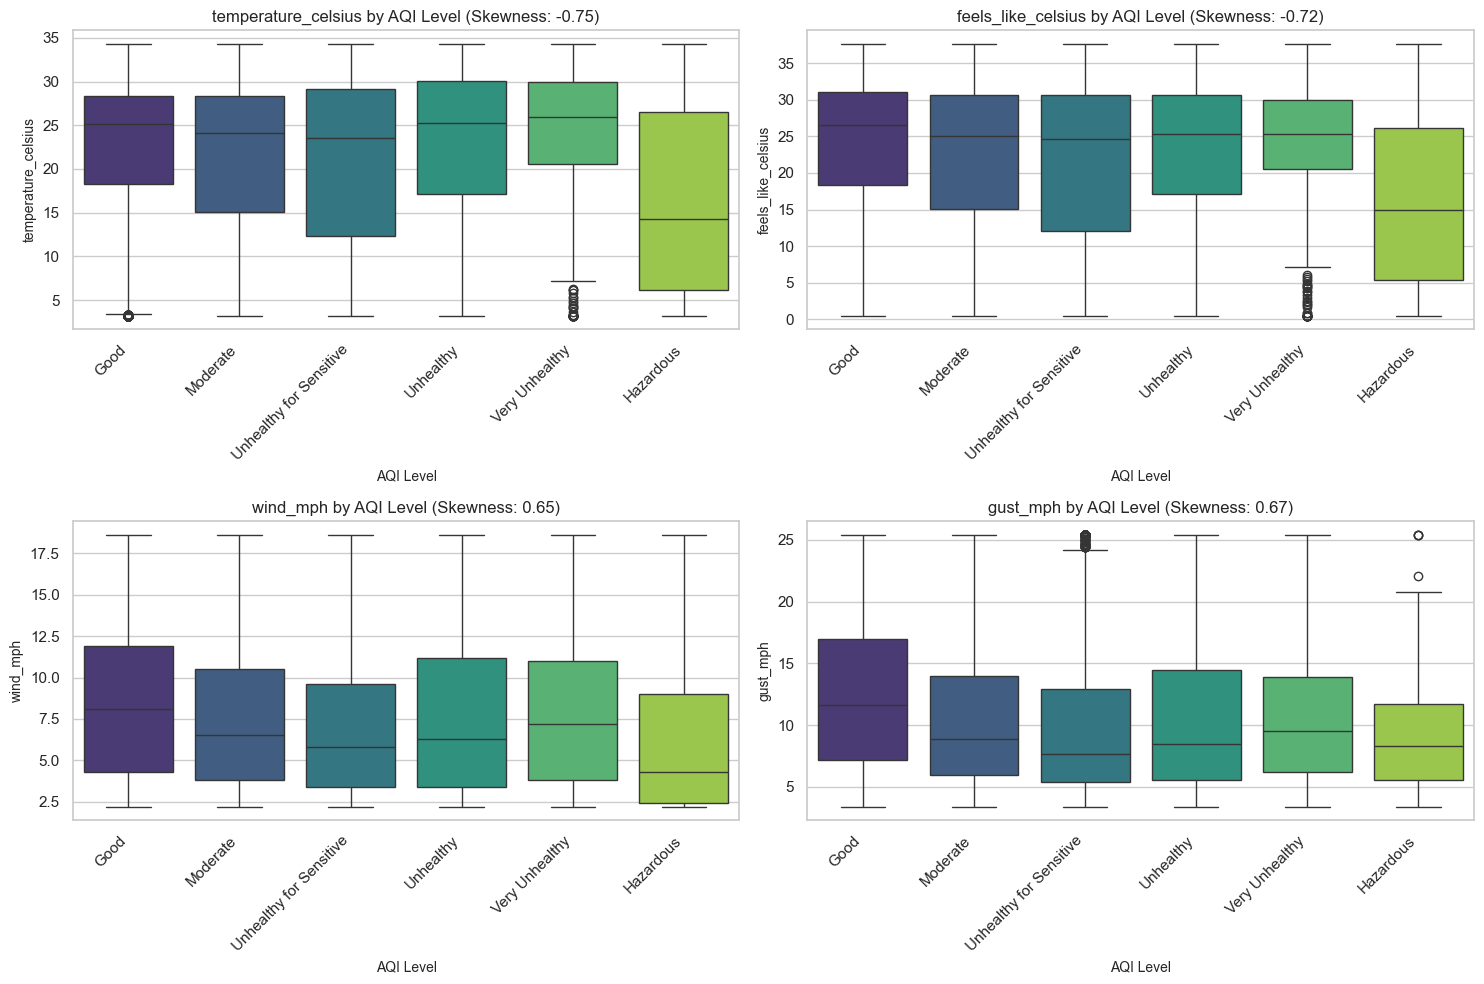

In [28]:
# Plot box plots of moderately skewed features by AQI level
moderate_skew_cols = ['temperature_celsius', 'feels_like_celsius', 'wind_mph', 'gust_mph']
plt.figure(figsize=(15, 10))
for i, col in enumerate(moderate_skew_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='air_quality_us-epa-index', y=col, data=air, palette='viridis')
    plt.title(f'{col} by AQI Level (Skewness: {skew(air[col]):.2f})', fontsize=12)
    plt.xlabel('AQI Level', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.xticks(ticks=range(6), labels=['Good', 'Moderate', 'Unhealthy for Sensitive', 
                                       'Unhealthy', 'Very Unhealthy', 'Hazardous'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Confirm current columns and skewness
print("Current Columns:", air.columns.tolist())
print("Current Skewness for Key Features:")
print(f"precip_mm (Transformed): {skew(air['precip_mm']):.2f}")
print(f"visibility_km (Original): {skew(air['visibility_km']):.2f}")

Current Columns: ['latitude', 'longitude', 'temperature_celsius', 'condition_text', 'wind_mph', 'wind_degree', 'pressure_mb', 'humidity', 'cloud', 'feels_like_celsius', 'uv_index', 'gust_mph', 'air_quality_Ozone', 'air_quality_us-epa-index', 'precip_mm', 'air_quality_Sulphur_dioxide', 'air_quality_Carbon_Monoxide', 'air_quality_PM10', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'visibility_km']
Current Skewness for Key Features:
precip_mm (Transformed): 4.20
visibility_km (Original): -3.80


In [ ]:
# Reload the original data for visibility_km
air_original = pd.read_csv('GlobalWeatherRepo.csv')[['visibility_km']]

# Replace the current visibility_km with the original values
air['visibility_km'] = air_original['visibility_km']

# Recalculate skewness to confirm reversion
print("Skewness After Reverting visibility_km:")
print(f"visibility_km (Original): {skew(air['visibility_km']):.2f}")
print(f"precip_mm (Transformed): {skew(air['precip_mm']):.2f}")

Number of Negative Values in Original visibility_km: 0
Skewness After Reverting visibility_km:
visibility_km (Original): 1.21
precip_mm (Transformed): 4.20


In [32]:
# Confirm current columns and skewness
print("Current Columns:", air.columns.tolist())
print("Current Skewness for Key Features:")
print(f"precip_mm (Transformed): {skew(air['precip_mm']):.2f}")
print(f"visibility_km (Original): {skew(air['visibility_km']):.2f}")

Current Columns: ['latitude', 'longitude', 'temperature_celsius', 'condition_text', 'wind_mph', 'wind_degree', 'pressure_mb', 'humidity', 'cloud', 'feels_like_celsius', 'uv_index', 'gust_mph', 'air_quality_Ozone', 'air_quality_us-epa-index', 'precip_mm', 'air_quality_Sulphur_dioxide', 'air_quality_Carbon_Monoxide', 'air_quality_PM10', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'visibility_km']
Current Skewness for Key Features:
precip_mm (Transformed): 4.20
visibility_km (Original): 1.21


In [33]:
# Check unique values in condition_text
print("Unique Values in condition_text:", air['condition_text'].nunique())
print(air['condition_text'].value_counts())

Unique Values in condition_text: 47
condition_text
Partly cloudy                                  21093
Sunny                                          18812
Patchy rain nearby                              4727
Overcast                                        2979
Partly Cloudy                                   2790
Clear                                           2690
Mist                                            1980
Light rain                                      1767
Light rain shower                               1569
Fog                                              567
Cloudy                                           542
Moderate or heavy rain with thunder              459
Moderate rain                                    429
Patchy light rain with thunder                   339
Light drizzle                                    292
Patchy light drizzle                             187
Light snow                                       182
Moderate or heavy rain shower                   

In [34]:
# One-hot encode condition_text
air_encoded = pd.get_dummies(air, columns=['condition_text'], prefix='condition')

# Confirm new columns
print("Columns After Encoding:", air_encoded.columns.tolist())

Columns After Encoding: ['latitude', 'longitude', 'temperature_celsius', 'wind_mph', 'wind_degree', 'pressure_mb', 'humidity', 'cloud', 'feels_like_celsius', 'uv_index', 'gust_mph', 'air_quality_Ozone', 'air_quality_us-epa-index', 'precip_mm', 'air_quality_Sulphur_dioxide', 'air_quality_Carbon_Monoxide', 'air_quality_PM10', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'visibility_km', 'condition_Blizzard', 'condition_Blowing snow', 'condition_Clear', 'condition_Cloudy', 'condition_Fog', 'condition_Freezing drizzle', 'condition_Freezing fog', 'condition_Heavy rain', 'condition_Heavy rain at times', 'condition_Heavy snow', 'condition_Light drizzle', 'condition_Light freezing rain', 'condition_Light rain', 'condition_Light rain shower', 'condition_Light sleet', 'condition_Light sleet showers', 'condition_Light snow', 'condition_Light snow showers', 'condition_Mist', 'condition_Moderate or heavy rain in area with thunder', 'condition_Moderate or heavy rain shower', 'condition_Moder

### Feature Engineering

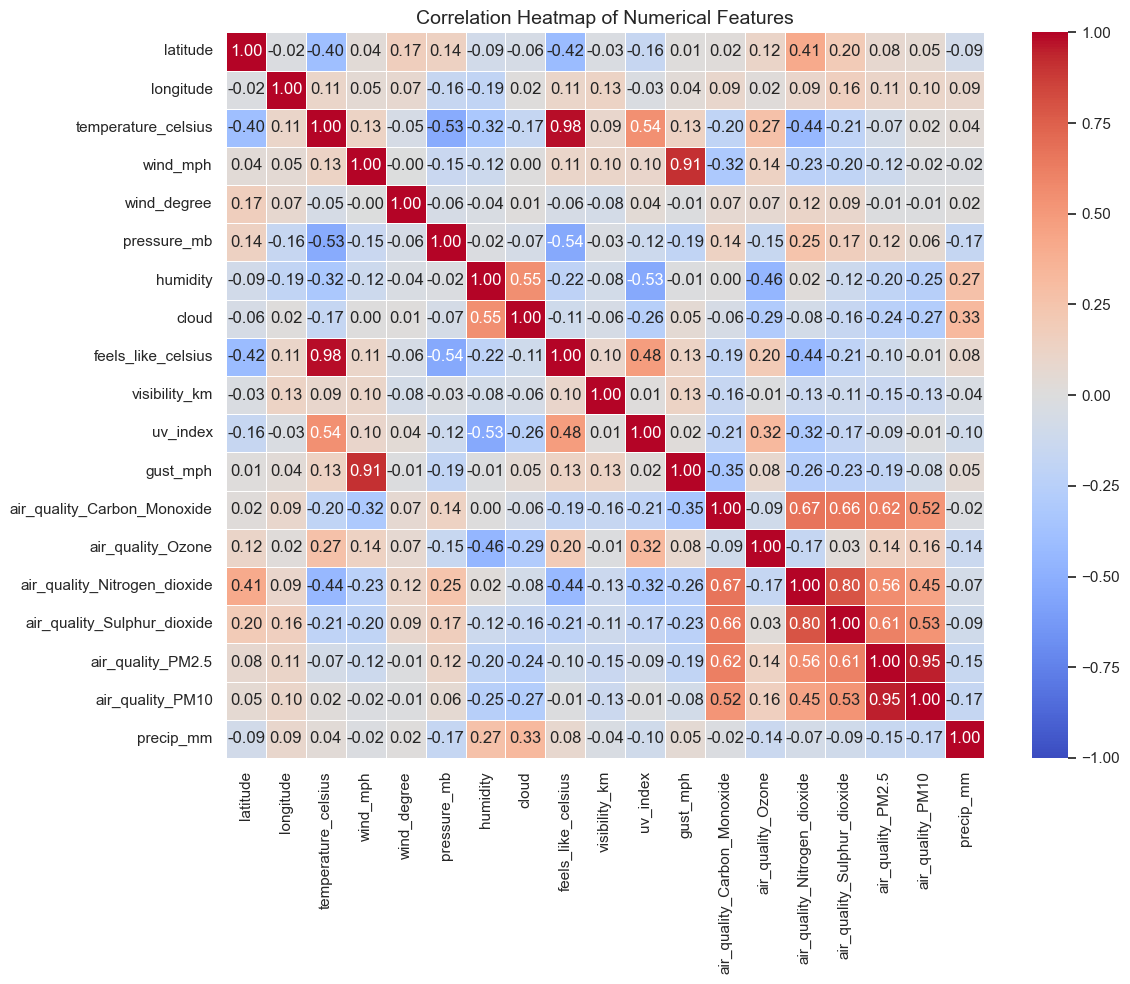

In [35]:
# Select numerical features (excluding the target and one-hot encoded columns)
numerical_cols = [
    'latitude', 'longitude', 'temperature_celsius', 'wind_mph', 'wind_degree',
    'pressure_mb', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',
    'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5',
    'air_quality_PM10', 'precip_mm'
]

# Calculate correlation matrix
corr_matrix = air_encoded[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

# Select numerical features (excluding target and one-hot encoded columns)
numerical_cols_updated = [col for col in numerical_cols if col not in ['feels_like_celsius', 'gust_mph']]

# Standardize numerical features to compare variances on the same scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(air_encoded[numerical_cols_updated])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols_updated)

# Calculate variance for each feature
variances = scaled_df.var()
print("Variance of Numerical Features (After Standardization):")
for col, var in variances.items():
    print(f"{col}: {var:.4f}")

# Identify features with low variance (e.g., < 0.01)
low_variance_cols = variances[variances < 0.01].index.tolist()
print("Features with Low Variance (< 0.01):", low_variance_cols)

Variance of Numerical Features (After Standardization):
latitude: 1.0000
longitude: 1.0000
temperature_celsius: 1.0000
wind_mph: 1.0000
wind_degree: 1.0000
pressure_mb: 1.0000
humidity: 1.0000
cloud: 1.0000
visibility_km: 1.0000
uv_index: 1.0000
air_quality_Carbon_Monoxide: 1.0000
air_quality_Ozone: 1.0000
air_quality_Nitrogen_dioxide: 1.0000
air_quality_Sulphur_dioxide: 1.0000
air_quality_PM2.5: 1.0000
air_quality_PM10: 1.0000
precip_mm: 1.0000
Features with Low Variance (< 0.01): []


### Save clean Dataset

In [39]:
air.to_csv("Cleaned_weather_repo.csv", index = False)

### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = air_encoded.drop(columns=['air_quality_us-epa-index'])
y = air_encoded['air_quality_us-epa-index']

# Step 1: Split into train (70%) and temp (30%) with stratification
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

# Step 2: Split the temp set into validation (15%) and test (15%) with stratification
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5,  # 50% of 30% = 15% of original data
    random_state=42, 
    stratify=y_temp
)

# Step 3: Print shapes to confirm the split
print("Dataset Shapes:")
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation set: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test set: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Step 4: Check class distribution in each set to confirm stratification
print("\nClass Distribution (Proportions):")
print("Training set:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nValidation set:")
print(y_val.value_counts(normalize=True).sort_index())
print("\nTest set:")
print(y_test.value_counts(normalize=True).sort_index())

Dataset Shapes:
Training set: X_train: (43654, 61), y_train: (43654,)
Validation set: X_val: (9354, 61), y_val: (9354,)
Test set: X_test: (9355, 61), y_test: (9355,)

Class Distribution (Proportions):
Training set:
air_quality_us-epa-index
1    0.537110
2    0.289595
3    0.092798
4    0.066180
5    0.009438
6    0.004879
Name: proportion, dtype: float64

Validation set:
air_quality_us-epa-index
1    0.537096
2    0.289609
3    0.092795
4    0.066175
5    0.009408
6    0.004918
Name: proportion, dtype: float64

Test set:
air_quality_us-epa-index
1    0.537146
2    0.289578
3    0.092785
4    0.066168
5    0.009514
6    0.004810
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Remove the target column from X_train, X_val, X_test (if present)
if 'air_quality_us-epa-index' in X_train.columns:
    X_train = X_train.drop(columns=['air_quality_us-epa-index'])
    X_val = X_val.drop(columns=['air_quality_us-epa-index'])
    X_test = X_test.drop(columns=['air_quality_us-epa-index'])

X_train['wind_precip_interaction'] = X_train['wind_mph'] * X_train['precip_mm']
X_val['wind_precip_interaction'] = X_val['wind_mph'] * X_val['precip_mm']
X_test['wind_precip_interaction'] = X_test['wind_mph'] * X_test['precip_mm']

X_train['pm2.5_to_pm10_ratio'] = X_train['air_quality_PM2.5'] / (X_train['air_quality_PM10'] + 1e-6)
X_val['pm2.5_to_pm10_ratio'] = X_val['air_quality_PM2.5'] / (X_val['air_quality_PM10'] + 1e-6)
X_test['pm2.5_to_pm10_ratio'] = X_test['air_quality_PM2.5'] / (X_test['air_quality_PM10'] + 1e-6)

# SUpdate the list of numerical features to scale 
numerical_cols_to_scale = [
    'latitude', 'longitude', 'temperature_celsius', 'wind_mph', 'wind_degree', 
    'pressure_mb', 'humidity', 'cloud', 'feels_like_celsius', 'uv_index', 'gust_mph', 
    'air_quality_Ozone', 'precip_mm', 'air_quality_Sulphur_dioxide', 
    'air_quality_Carbon_Monoxide', 'air_quality_PM10', 'air_quality_Nitrogen_dioxide', 
    'air_quality_PM2.5', 'visibility_km', 'wind_precip_interaction', 'pm2.5_to_pm10_ratio'
]

# Initialize the scaler
scaler = StandardScaler()

#Fit the scaler on the training set and transform
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])

# Transform the validation and test sets
X_val_scaled = X_val.copy()
X_val_scaled[numerical_cols_to_scale] = scaler.transform(X_val[numerical_cols_to_scale])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

# Confirm scaling (check mean and std of the scaled features in the training set)
print("\nMean of Scaled Features in Train Set:")
print(X_train_scaled[numerical_cols_to_scale].mean())
print("\nStd of Scaled Features in Train Set:")
print(X_train_scaled[numerical_cols_to_scale].std())

# Verify shapes of scaled data
print("\nShapes of Scaled Data:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_val_scaled: {X_val_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

# Check that non-numerical features were not scaled 
non_numerical_cols = [col for col in X_train.columns if col not in numerical_cols_to_scale]
print("\nSample of Non-Numerical Features (Should be 0/1):")
print(X_train_scaled[non_numerical_cols].head())


Mean of Scaled Features in Train Set:
latitude                        1.312715e-16
longitude                      -5.542214e-17
temperature_celsius            -3.411595e-16
wind_mph                        4.231940e-17
wind_degree                     8.162761e-17
pressure_mb                    -7.568336e-15
humidity                       -1.216683e-17
cloud                           9.391652e-17
feels_like_celsius             -1.684638e-16
uv_index                        5.420139e-17
gust_mph                        9.847399e-17
air_quality_Ozone               1.673244e-16
precip_mm                      -1.031942e-16
air_quality_Sulphur_dioxide     1.598371e-16
air_quality_Carbon_Monoxide    -9.265507e-16
air_quality_PM10               -5.600810e-16
air_quality_Nitrogen_dioxide   -8.122070e-17
air_quality_PM2.5               2.767038e-18
visibility_km                  -1.565818e-16
wind_precip_interaction         5.513730e-17
pm2.5_to_pm10_ratio             7.237431e-16
dtype: float64



### Model Training

In [42]:
# Check data types of columns in X_train_scaled
print("Data Types in X_train_scaled:")
print(X_train_scaled.dtypes)

# Check for any object or non-numeric columns
non_numeric_cols = X_train_scaled.select_dtypes(include=['object']).columns
print("\nNon-Numeric Columns in X_train_scaled:")
print(non_numeric_cols)

Data Types in X_train_scaled:
latitude                                  float64
longitude                                 float64
temperature_celsius                       float64
wind_mph                                  float64
wind_degree                               float64
                                           ...   
condition_Thundery outbreaks in nearby       bool
condition_Thundery outbreaks possible        bool
condition_Torrential rain shower             bool
wind_precip_interaction                   float64
pm2.5_to_pm10_ratio                       float64
Length: 63, dtype: object

Non-Numeric Columns in X_train_scaled:
Index([], dtype='object')


In [43]:
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert all columns in X_train_scaled, X_val_scaled, X_test_scaled to float64 to ensure homogeneity
X_train_scaled = X_train_scaled.astype('float64')
X_val_scaled = X_val_scaled.astype('float64')
X_test_scaled = X_test_scaled.astype('float64')

# Convert to NumPy arrays
X_train_tabnet = X_train_scaled.to_numpy()
X_val_tabnet = X_val_scaled.to_numpy()
X_test_tabnet = X_test_scaled.to_numpy()
y_train_tabnet = y_train.to_numpy()
y_val_tabnet = y_val.to_numpy()
y_test_tabnet = y_test.to_numpy()

# Verify the dtype of X_train_tabnet
print("Dtype of X_train_tabnet after conversion:")
print(X_train_tabnet.dtype)

# Adjust labels to start from 0 (TabNet expects labels 0 to n_classes-1, so 1-6 becomes 0-5)
y_train_tabnet = y_train_tabnet - 1
y_val_tabnet = y_val_tabnet - 1
y_test_tabnet = y_test_tabnet - 1

# Initialize TabNet model
tabnet = TabNetClassifier(
    n_d=8,  # Width of the decision prediction layer
    n_a=8,  # Width of the attention embedding
    n_steps=3,  # Number of steps in the architecture
    verbose=1,
    device_name='cpu'  # Use 'cuda' if GPU is available
)

# Train the model
tabnet.fit(
    X_train=X_train_tabnet,
    y_train=y_train_tabnet,
    eval_set=[(X_train_tabnet, y_train_tabnet), (X_val_tabnet, y_val_tabnet)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,  # Early stopping after 10 epochs of no improvement
    batch_size=1024,
    virtual_batch_size=128
)



Dtype of X_train_tabnet after conversion:
float64


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.20443 | train_accuracy: 0.67208 | val_accuracy: 0.67554 |  0:00:05s
epoch 1  | loss: 0.65578 | train_accuracy: 0.81672 | val_accuracy: 0.81976 |  0:00:11s
epoch 2  | loss: 0.34746 | train_accuracy: 0.89032 | val_accuracy: 0.88561 |  0:00:16s
epoch 3  | loss: 0.23134 | train_accuracy: 0.92967 | val_accuracy: 0.92784 |  0:00:22s
epoch 4  | loss: 0.1864  | train_accuracy: 0.95556 | val_accuracy: 0.95809 |  0:00:27s
epoch 5  | loss: 0.16544 | train_accuracy: 0.94023 | val_accuracy: 0.93874 |  0:00:33s
epoch 6  | loss: 0.15812 | train_accuracy: 0.94019 | val_accuracy: 0.93586 |  0:00:39s
epoch 7  | loss: 0.14785 | train_accuracy: 0.96907 | val_accuracy: 0.96953 |  0:00:54s
epoch 8  | loss: 0.13761 | train_accuracy: 0.9737  | val_accuracy: 0.97381 |  0:01:01s
epoch 9  | loss: 0.13741 | train_accuracy: 0.96394 | val_accuracy: 0.96333 |  0:01:07s
epoch 10 | loss: 0.14138 | train_accuracy: 0.93419 | val_accuracy: 0.93083 |  0:01:13s
epoch 11 | loss: 0.13607 | train_accuracy: 

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


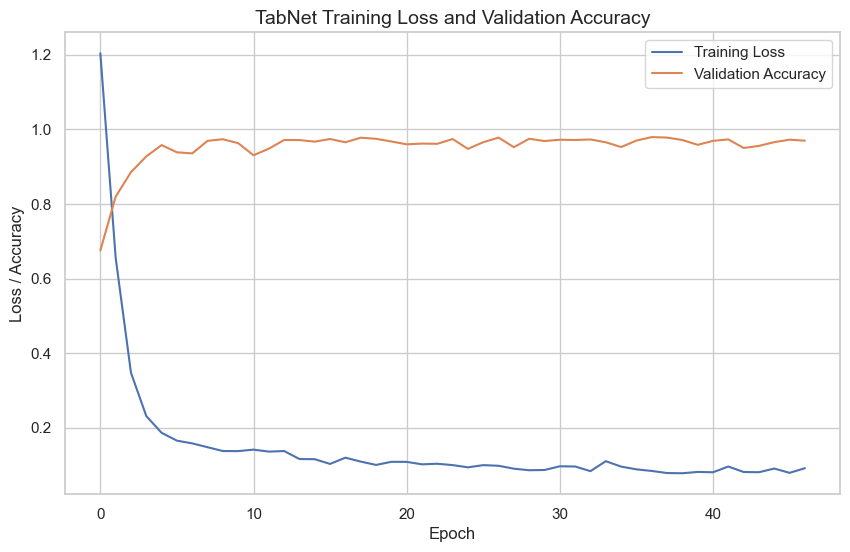

In [44]:
# Plot training and validation loss/accuracy
plt.figure(figsize=(10, 6))
plt.plot(tabnet.history['loss'], label='Training Loss')
plt.plot(tabnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('TabNet Training Loss and Validation Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss / Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Predict on validation and test sets
y_val_pred_tabnet = tabnet.predict(X_val_tabnet) + 1  # Adjust labels back to 1-6
y_test_pred_tabnet = tabnet.predict(X_test_tabnet) + 1

In [45]:
# Evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred_tabnet)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(y_val, y_val_pred_tabnet, average='macro')

print("\nTabNet Validation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision (Macro): {val_precision:.4f}")
print(f"Recall (Macro): {val_recall:.4f}")
print(f"F1-Score (Macro): {val_f1:.4f}")
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred_tabnet, target_names=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']))

# Evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred_tabnet)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred_tabnet, average='macro')

print("\nTabNet Test Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision (Macro): {test_precision:.4f}")
print(f"Recall (Macro): {test_recall:.4f}")
print(f"F1-Score (Macro): {test_f1:.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_tabnet, target_names=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']))




TabNet Validation Metrics:
Accuracy: 0.9796
Precision (Macro): 0.8432
Recall (Macro): 0.7534
F1-Score (Macro): 0.7763

Classification Report (Validation):
                         precision    recall  f1-score   support

                   Good       1.00      0.99      1.00      5024
               Moderate       0.99      0.99      0.99      2709
Unhealthy for Sensitive       0.95      1.00      0.97       868
              Unhealthy       0.89      0.97      0.93       619
         Very Unhealthy       0.46      0.30      0.36        88
              Hazardous       0.76      0.28      0.41        46

               accuracy                           0.98      9354
              macro avg       0.84      0.75      0.78      9354
           weighted avg       0.98      0.98      0.98      9354


TabNet Test Metrics:
Accuracy: 0.9796
Precision (Macro): 0.8545
Recall (Macro): 0.7651
F1-Score (Macro): 0.7907

Classification Report (Test):
                         precision    recall  f

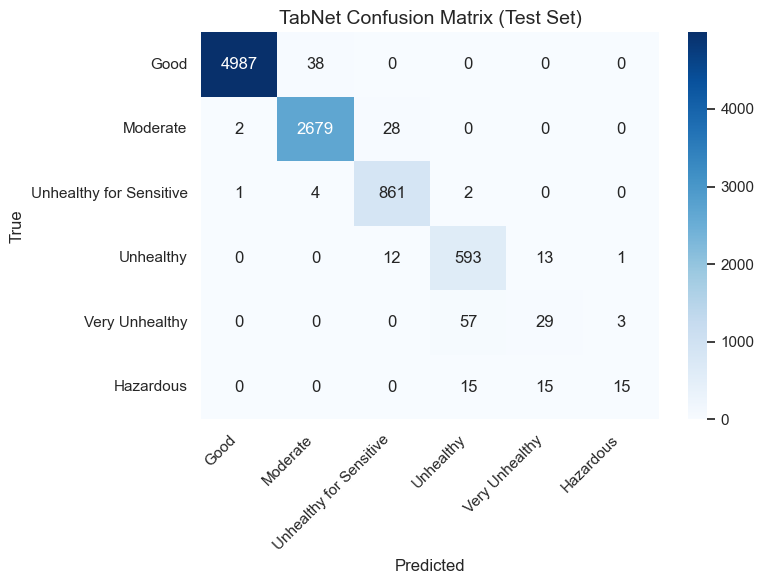

In [46]:
# Confusion Matrix for Test Set
cm = confusion_matrix(y_test, y_test_pred_tabnet)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'],
            yticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.title('TabNet Confusion Matrix (Test Set)', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## MLP

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 neurons
    activation='relu',  # ReLU activation function
    solver='adam',  # Adam optimizer
    max_iter=500,  # Maximum number of iterations (epochs)
    early_stopping=True,  # Enable early stopping based on validation score
    validation_fraction=0.1,  # Fraction of training data to use for validation
    n_iter_no_change=10,  # Number of iterations with no improvement to stop training
    verbose=True,  # Print progress messages
    random_state=42
)

# Train the model
# Note: MLPClassifier automatically uses a subset of the training data for early stopping validation,
# but we can also use our validation set (X_val_scaled, y_val) for evaluation during training.
mlp.fit(X_train_scaled, y_train)



Iteration 1, loss = 0.56424124
Validation score: 0.931974
Iteration 2, loss = 0.18571411
Validation score: 0.950756
Iteration 3, loss = 0.12670666
Validation score: 0.958772
Iteration 4, loss = 0.10152186
Validation score: 0.964040
Iteration 5, loss = 0.08876002
Validation score: 0.964498
Iteration 6, loss = 0.07922747
Validation score: 0.969995
Iteration 7, loss = 0.07241038
Validation score: 0.964498
Iteration 8, loss = 0.06810600
Validation score: 0.967247
Iteration 9, loss = 0.06429183
Validation score: 0.972515
Iteration 10, loss = 0.05932821
Validation score: 0.971828
Iteration 11, loss = 0.05770363
Validation score: 0.972744
Iteration 12, loss = 0.05445451
Validation score: 0.978012
Iteration 13, loss = 0.05138540
Validation score: 0.975951
Iteration 14, loss = 0.04969988
Validation score: 0.974805
Iteration 15, loss = 0.04969363
Validation score: 0.974805
Iteration 16, loss = 0.04790629
Validation score: 0.978699
Iteration 17, loss = 0.04493521
Validation score: 0.977096
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64), max_iter=500,
              random_state=42, verbose=True)

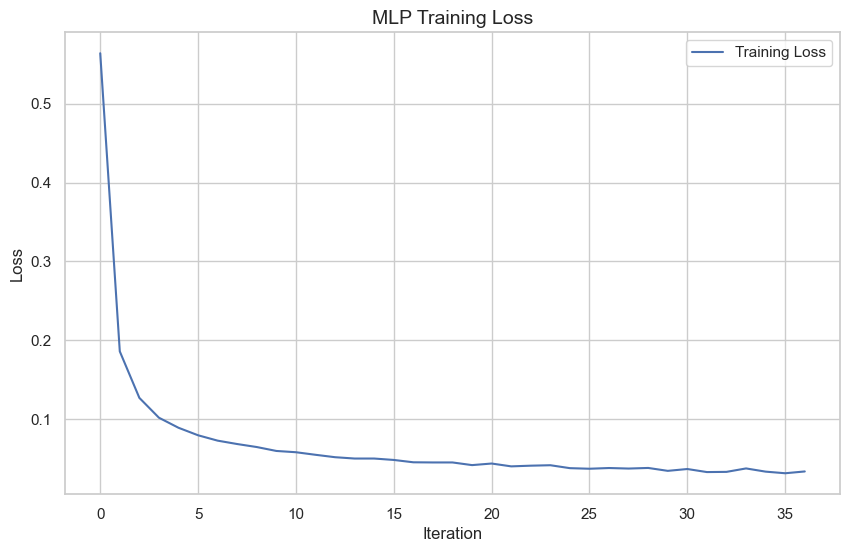


MLP Validation Metrics:
Accuracy: 0.9793
Precision (Macro): 0.8486
Recall (Macro): 0.8018
F1-Score (Macro): 0.8197

Classification Report (Validation):
                         precision    recall  f1-score   support

                   Good       1.00      0.99      1.00      5024
               Moderate       0.99      0.99      0.99      2709
Unhealthy for Sensitive       0.97      0.96      0.96       868
              Unhealthy       0.89      0.94      0.92       619
         Very Unhealthy       0.53      0.47      0.49        88
              Hazardous       0.72      0.46      0.56        46

               accuracy                           0.98      9354
              macro avg       0.85      0.80      0.82      9354
           weighted avg       0.98      0.98      0.98      9354


MLP Test Metrics:
Accuracy: 0.9776
Precision (Macro): 0.8344
Recall (Macro): 0.7913
F1-Score (Macro): 0.8071

Classification Report (Test):
                         precision    recall  f1-scor

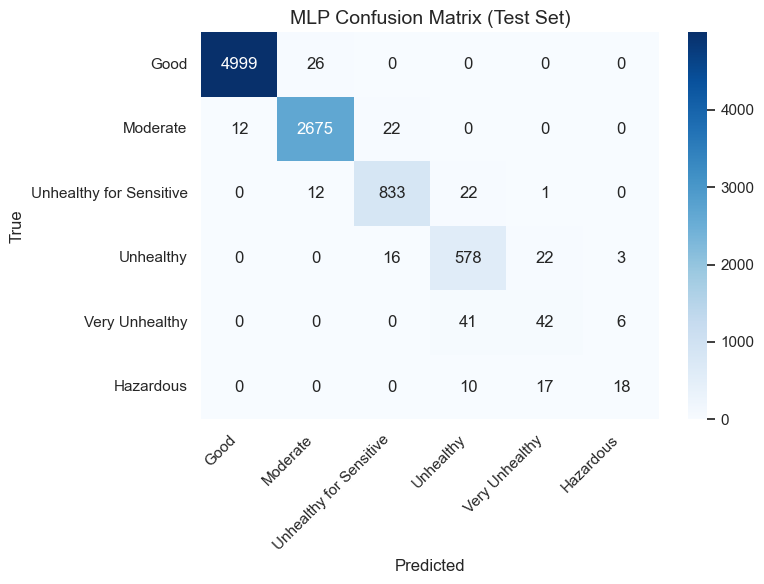

In [49]:
# Plot training loss curve (MLPClassifier provides loss_curve_)
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('MLP Training Loss', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Predict on validation and test sets
y_val_pred_mlp = mlp.predict(X_val_scaled)
y_test_pred_mlp = mlp.predict(X_test_scaled)

# Evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred_mlp)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(y_val, y_val_pred_mlp, average='macro')

print("\nMLP Validation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision (Macro): {val_precision:.4f}")
print(f"Recall (Macro): {val_recall:.4f}")
print(f"F1-Score (Macro): {val_f1:.4f}")
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred_mlp, target_names=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']))

# Evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred_mlp)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred_mlp, average='macro')

print("\nMLP Test Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision (Macro): {test_precision:.4f}")
print(f"Recall (Macro): {test_recall:.4f}")
print(f"F1-Score (Macro): {test_f1:.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_mlp, target_names=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']))

# Confusion Matrix for Test Set
cm = confusion_matrix(y_test, y_test_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'],
            yticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.title('MLP Confusion Matrix (Test Set)', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## xGBoost

In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize XGBoost model
xgb = XGBClassifier(
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',  # Multi-class classification
    num_class=6,  # Explicitly specify number of classes (1-6 becomes 0-5)
    eval_metric='mlogloss',  # Multi-class log loss for evaluation
    early_stopping_rounds=50,  # Early stopping after 50 rounds of no improvement
    random_state=42,
    verbosity=1  # Print progress
)

# Convert all data to numpy arrays for XGBoost compatibility
X_train_array = X_train_scaled.values.astype(np.float32)
X_val_array = X_val_scaled.values.astype(np.float32)
X_test_array = X_test_scaled.values.astype(np.float32)

# Adjust labels to 0-5 range for XGBoost
y_train_adj = y_train - 1
y_val_adj = y_val - 1

# Train the model using scaled data for both training and evaluation
xgb.fit(
    X_train_array, y_train_adj,
    eval_set=[(X_train_array, y_train_adj), (X_val_array, y_val_adj)],
    verbose=100  # Print progress every 100 iterations
)

# Predict on validation and test sets (using scaled data)
y_val_pred = xgb.predict(X_val_array) + 1  # Convert back to 1-6 range
y_test_pred = xgb.predict(X_test_array) + 1



[0]	validation_0-mlogloss:1.50673	validation_1-mlogloss:1.50693
[100]	validation_0-mlogloss:0.00951	validation_1-mlogloss:0.02167
[200]	validation_0-mlogloss:0.00353	validation_1-mlogloss:0.02152
[205]	validation_0-mlogloss:0.00340	validation_1-mlogloss:0.02153



XGBoost Validation Metrics:
Accuracy: 0.9907
Precision (Macro): 0.8797
Recall (Macro): 0.8473
F1-Score (Macro): 0.8617

Classification Report (Validation):
                         precision    recall  f1-score   support

                   Good       1.00      1.00      1.00      5024
               Moderate       1.00      1.00      1.00      2709
Unhealthy for Sensitive       1.00      1.00      1.00       868
              Unhealthy       0.94      0.97      0.95       619
         Very Unhealthy       0.58      0.49      0.53        88
              Hazardous       0.76      0.63      0.69        46

               accuracy                           0.99      9354
              macro avg       0.88      0.85      0.86      9354
           weighted avg       0.99      0.99      0.99      9354



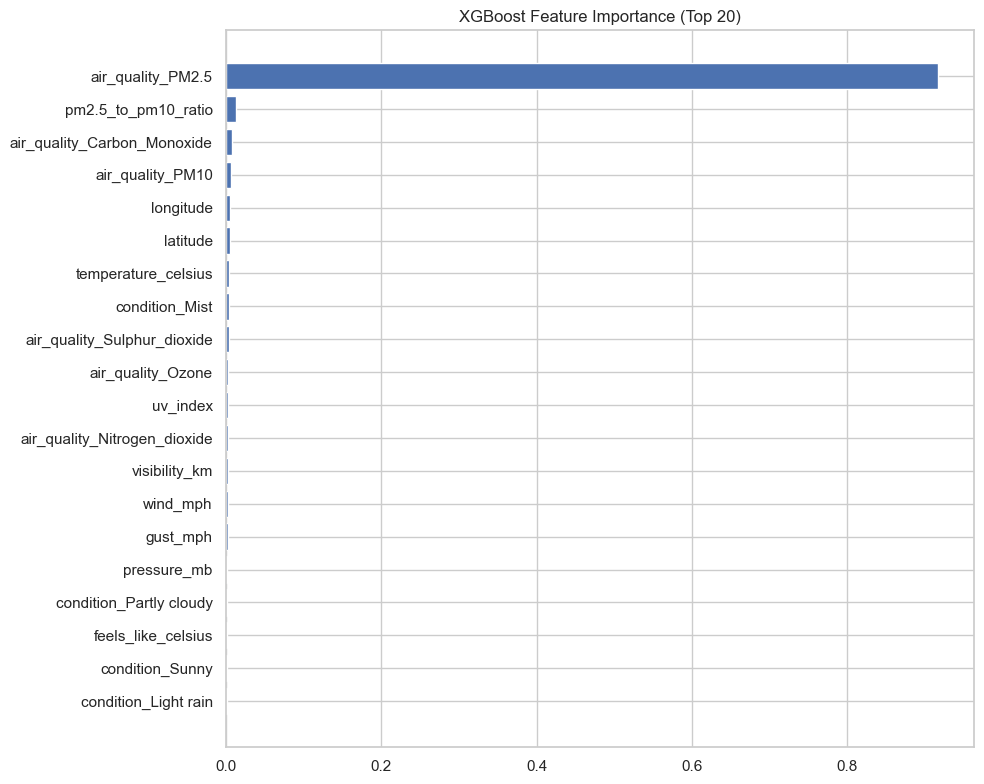

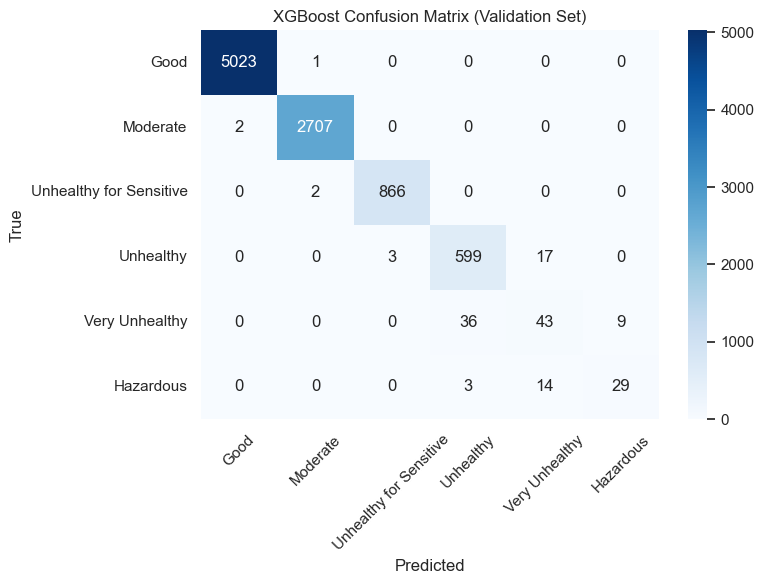

In [ ]:
# Evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average='macro')

print("\nXGBoost Validation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision (Macro): {val_precision:.4f}")
print(f"Recall (Macro): {val_recall:.4f}")
print(f"F1-Score (Macro): {val_f1:.4f}")

print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred, 
    target_names=['Good', 'Moderate', 'Unhealthy for Sensitive', 
                 'Unhealthy', 'Very Unhealthy', 'Hazardous']))

# Plot feature importance
plt.figure(figsize=(10, 8))
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train_scaled.columns[sorted_idx][-20:], xgb.feature_importances_[sorted_idx][-20:])
plt.title("XGBoost Feature Importance (Top 20)")
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive', 
                        'Unhealthy', 'Very Unhealthy', 'Hazardous'],
            yticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive', 
                        'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.title('XGBoost Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## RF

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize Random Forest model
rf = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Handles class imbalance
    random_state=42,
    n_jobs=-1        # Use all available cores
)

# Convert scaled data to numpy arrays for optimal performance
X_train_array = X_train_scaled.values.astype(np.float32)
X_val_array = X_val_scaled.values.astype(np.float32)
X_test_array = X_test_scaled.values.astype(np.float32)

# Train the model using scaled training data
rf.fit(X_train_array, y_train)

# Predict on scaled validation and test sets
y_val_pred = rf.predict(X_val_array)
y_test_pred = rf.predict(X_test_array)




Random Forest Validation Metrics:
Accuracy: 0.9887
Precision (Macro): 0.8544
Recall (Macro): 0.8827
F1-Score (Macro): 0.8635

Classification Report (Validation):
                         precision    recall  f1-score   support

                   Good       1.00      1.00      1.00      5024
               Moderate       1.00      1.00      1.00      2709
Unhealthy for Sensitive       1.00      1.00      1.00       868
              Unhealthy       0.97      0.90      0.93       619
         Very Unhealthy       0.47      0.73      0.57        88
              Hazardous       0.69      0.67      0.68        46

               accuracy                           0.99      9354
              macro avg       0.85      0.88      0.86      9354
           weighted avg       0.99      0.99      0.99      9354



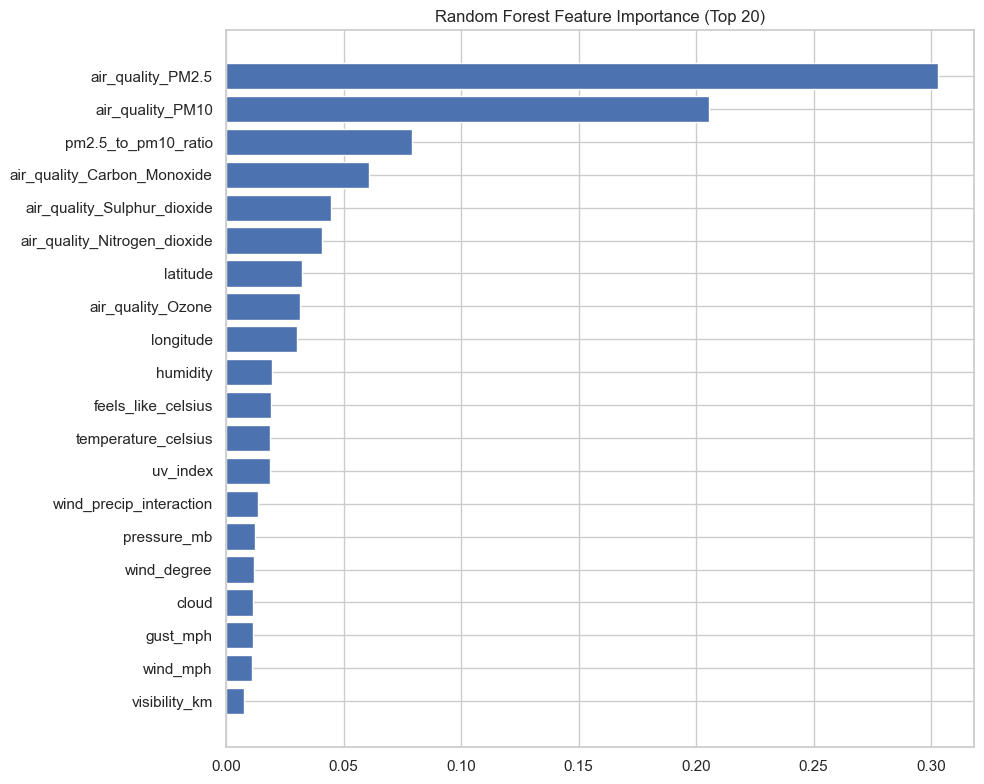

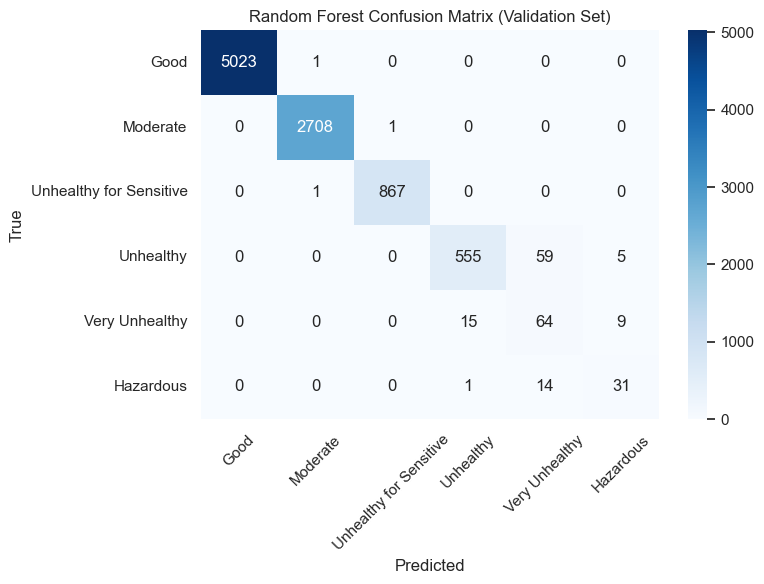

In [65]:
# Evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(
    y_val, y_val_pred, average='macro'
)

print("\nRandom Forest Validation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision (Macro): {val_precision:.4f}")
print(f"Recall (Macro): {val_recall:.4f}")
print(f"F1-Score (Macro): {val_f1:.4f}")

print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred,
    target_names=['Good', 'Moderate', 'Unhealthy for Sensitive',
                 'Unhealthy', 'Very Unhealthy', 'Hazardous']))

# Plot feature importance
plt.figure(figsize=(10, 8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train_scaled.columns[sorted_idx][-20:], rf.feature_importances_[sorted_idx][-20:])
plt.title("Random Forest Feature Importance (Top 20)")
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive',
                        'Unhealthy', 'Very Unhealthy', 'Hazardous'],
            yticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive',
                        'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.title('Random Forest Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## SVM

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize SVM model
svm = SVC(
    kernel='linear',  # Linear kernel for simplicity; can try 'rbf' for better performance
    C=1.0,  # Regularization parameter
    random_state=42,
    probability=True  # Enable probability estimates for potential future use
)

# Train the model
# Note: SVM can be slow on large datasets; if training takes too long, consider subsampling the data
svm.fit(X_train_scaled, y_train)

# Predict on validation and test sets
y_val_pred_svm = svm.predict(X_val_scaled)
y_test_pred_svm = svm.predict(X_test_scaled)




SVM Validation Metrics:
Accuracy: 0.9823
Precision (Macro): 0.8525
Recall (Macro): 0.7661
F1-Score (Macro): 0.7876

Classification Report (Validation):
                         precision    recall  f1-score   support

                   Good       1.00      1.00      1.00      5024
               Moderate       0.99      0.99      0.99      2709
Unhealthy for Sensitive       0.98      0.99      0.99       868
              Unhealthy       0.90      0.95      0.93       619
         Very Unhealthy       0.43      0.39      0.41        88
              Hazardous       0.81      0.28      0.42        46

               accuracy                           0.98      9354
              macro avg       0.85      0.77      0.79      9354
           weighted avg       0.98      0.98      0.98      9354


SVM Test Metrics:
Accuracy: 0.9830
Precision (Macro): 0.8598
Recall (Macro): 0.7912
F1-Score (Macro): 0.8129

Classification Report (Test):
                         precision    recall  f1-scor

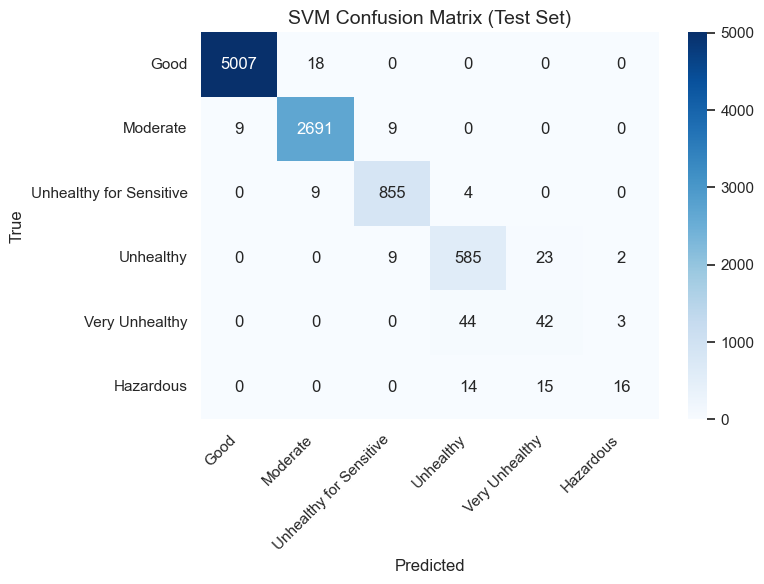

In [67]:
# Evaluation metrics for validation set
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
val_precision_svm, val_recall_svm, val_f1_svm, _ = precision_recall_fscore_support(y_val, y_val_pred_svm, average='macro')

print("\nSVM Validation Metrics:")
print(f"Accuracy: {val_accuracy_svm:.4f}")
print(f"Precision (Macro): {val_precision_svm:.4f}")
print(f"Recall (Macro): {val_recall_svm:.4f}")
print(f"F1-Score (Macro): {val_f1_svm:.4f}")
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred_svm, target_names=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']))

# Evaluation metrics for test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_precision_svm, test_recall_svm, test_f1_svm, _ = precision_recall_fscore_support(y_test, y_test_pred_svm, average='macro')

print("\nSVM Test Metrics:")
print(f"Accuracy: {test_accuracy_svm:.4f}")
print(f"Precision (Macro): {test_precision_svm:.4f}")
print(f"Recall (Macro): {test_recall_svm:.4f}")
print(f"F1-Score (Macro): {test_f1_svm:.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_svm, target_names=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']))

# Confusion Matrix for Test Set
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'],
            yticklabels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.title('SVM Confusion Matrix (Test Set)', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Comparison

In [68]:
# TabNet predictions (assuming tabnet model is still in memory)
X_val_tabnet = X_val_scaled.to_numpy()
X_test_tabnet = X_test_scaled.to_numpy()
y_val_pred_tabnet = tabnet.predict(X_val_tabnet) + 1  # Adjust labels back to 1-6
y_test_pred_tabnet = tabnet.predict(X_test_tabnet) + 1

# MLP predictions (assuming mlp model is still in memory)
y_val_pred_mlp = mlp.predict(X_val_scaled)
y_test_pred_mlp = mlp.predict(X_test_scaled)

# XGBoost predictions (assuming xgb model is still in memory)
y_val_pred_xgb = xgb.predict(X_val_scaled) + 1  # Adjust labels back to 1-6
y_test_pred_xgb = xgb.predict(X_test_scaled) + 1

# Random Forest predictions (assuming rf model is still in memory)
y_val_pred_rf = rf.predict(X_val_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

# SVM predictions (assuming svm model is still in memory)
y_val_pred_svm = svm.predict(X_val_scaled)
y_test_pred_svm = svm.predict(X_test_scaled)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Model Comparison Table:
           Model  Validation Accuracy  Validation Precision (Macro)  \
0         TabNet               0.9796                        0.8432   
1            MLP               0.9793                        0.8486   
2        XGBoost               0.9907                        0.8797   
3  Random Forest               0.9887                        0.8544   
4            SVM               0.9823                        0.8525   

   Validation Recall (Macro)  Validation F1-Score (Macro)  Test Accuracy  \
0                     0.7534                       0.7763         0.9796   
1                     0.8018                       0.8197         0.9776   
2                     0.8473                       0.8617         0.9878   
3                     0.8827                       0.8635         0.9879   
4                     0.7661                       0.7876         0.9830   

   Test Precision (Macro)  Test Recall (Macro)  Test F1-Score (Macro)  
0                  

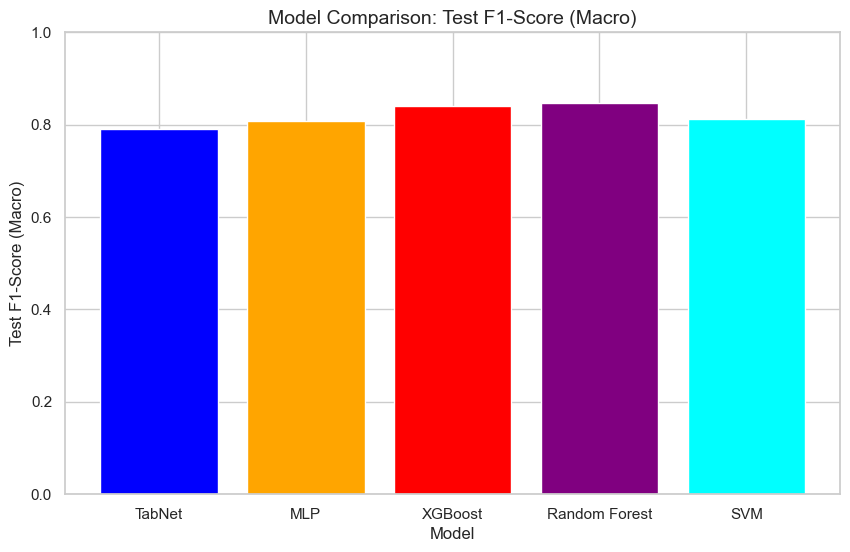

In [69]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Dictionary to store predictions for each model
predictions = {
    'TabNet': (y_val_pred_tabnet, y_test_pred_tabnet),
    'MLP': (y_val_pred_mlp, y_test_pred_mlp),
    'XGBoost': (y_val_pred_xgb, y_test_pred_xgb),
    'Random Forest': (y_val_pred_rf, y_test_pred_rf),
    'SVM': (y_val_pred_svm, y_test_pred_svm)
}

# Initialize lists to store metrics
models = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []

# Compute metrics for each model
for model_name, (y_val_pred, y_test_pred) in predictions.items():
    # Validation metrics
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average='macro')
    
    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
    
    # Store metrics
    models.append(model_name)
    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1s.append(val_f1)
    test_accuracies.append(test_accuracy)
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)
    test_f1s.append(test_f1)

# Create a dictionary with the computed metrics
metrics = {
    'Model': models,
    'Validation Accuracy': val_accuracies,
    'Validation Precision (Macro)': val_precisions,
    'Validation Recall (Macro)': val_recalls,
    'Validation F1-Score (Macro)': val_f1s,
    'Test Accuracy': test_accuracies,
    'Test Precision (Macro)': test_precisions,
    'Test Recall (Macro)': test_recalls,
    'Test F1-Score (Macro)': test_f1s
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(metrics)

# Round the metrics to 4 decimal places for readability
comparison_df = comparison_df.round(4)

# Display the comparison table
print("\nModel Comparison Table:")
print(comparison_df)

# Plot the comparison of test F1-scores
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Test F1-Score (Macro)'], color=['blue', 'orange', 'red', 'purple', 'cyan'])
plt.title('Model Comparison: Test F1-Score (Macro)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test F1-Score (Macro)', fontsize=12)
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

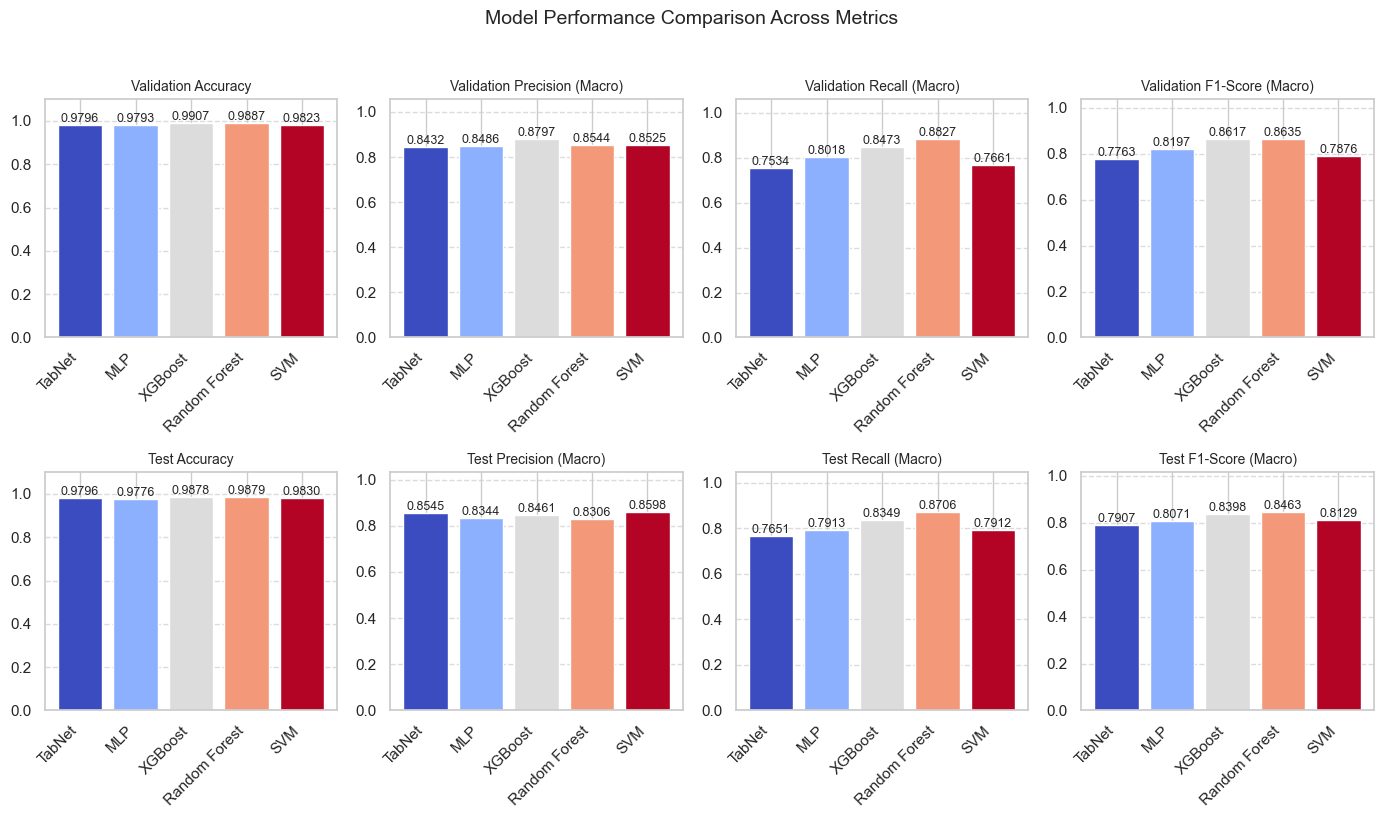

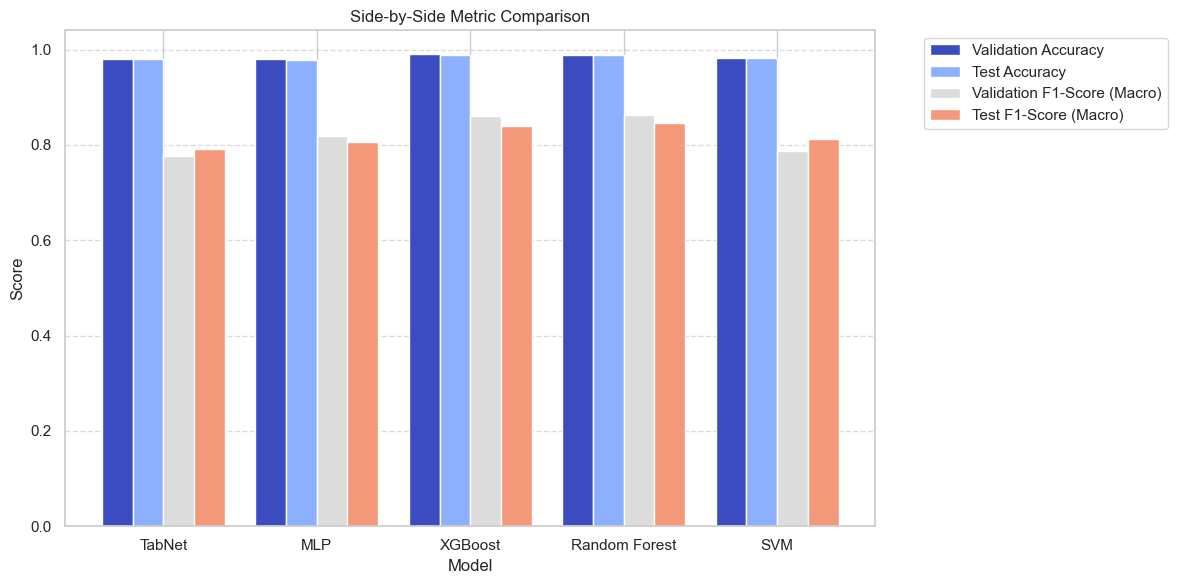

In [ ]:
# Set up the figure for multiple metrics comparison
plt.figure(figsize=(14, 8))

# Metrics to plot (excluding Model column)
metrics_to_plot = comparison_df.columns[1:]

# Create subplots for each metric
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 4, i)
    bars = plt.bar(comparison_df['Model'], comparison_df[metric], 
                  color=plt.cm.coolwarm(np.linspace(0, 1, len(comparison_df))))
    
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)
    
    plt.title(metric, fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.1 if 'Accuracy' in metric else comparison_df[metric].max()*1.2)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Model Performance Comparison Across Metrics', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
metrics_for_hist = ['Validation Accuracy', 'Test Accuracy', 
                   'Validation F1-Score (Macro)', 'Test F1-Score (Macro)']
x = np.arange(len(comparison_df['Model']))
width = 0.2

for i, metric in enumerate(metrics_for_hist):
    plt.bar(x + i*width, comparison_df[metric], width, 
            label=metric,
            color=plt.cm.coolwarm(i/len(metrics_for_hist)))
    
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Side-by-Side Metric Comparison')
plt.xticks(x + width*1.5, comparison_df['Model'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

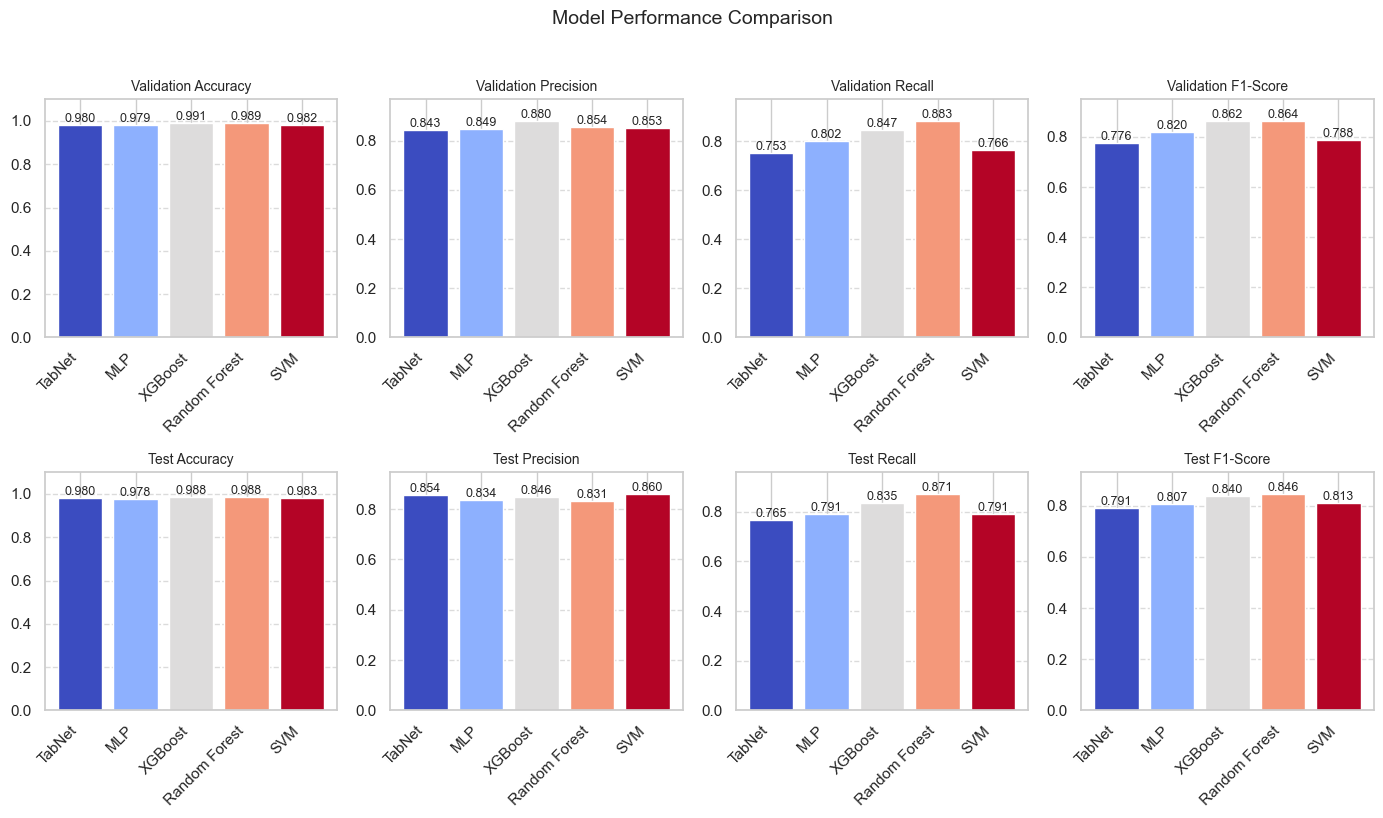

In [71]:
# Set up the figure for multiple metrics comparison
plt.figure(figsize=(14, 8))

# Define metrics to visualize (using your existing variables)
metrics = [
    ('Validation Accuracy', val_accuracies),
    ('Validation Precision', val_precisions),
    ('Validation Recall', val_recalls),
    ('Validation F1-Score', val_f1s),
    ('Test Accuracy', test_accuracies),
    ('Test Precision', test_precisions), 
    ('Test Recall', test_recalls),
    ('Test F1-Score', test_f1s)
]

# Create subplots for each metric
for i, (metric_name, values) in enumerate(metrics, 1):
    plt.subplot(2, 4, i)
    bars = plt.bar(models, values, color=plt.cm.coolwarm(np.linspace(0, 1, len(models))))
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)
    
    plt.title(metric_name, fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.1 if 'Accuracy' in metric_name else max(values)*1.1)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Model Performance Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

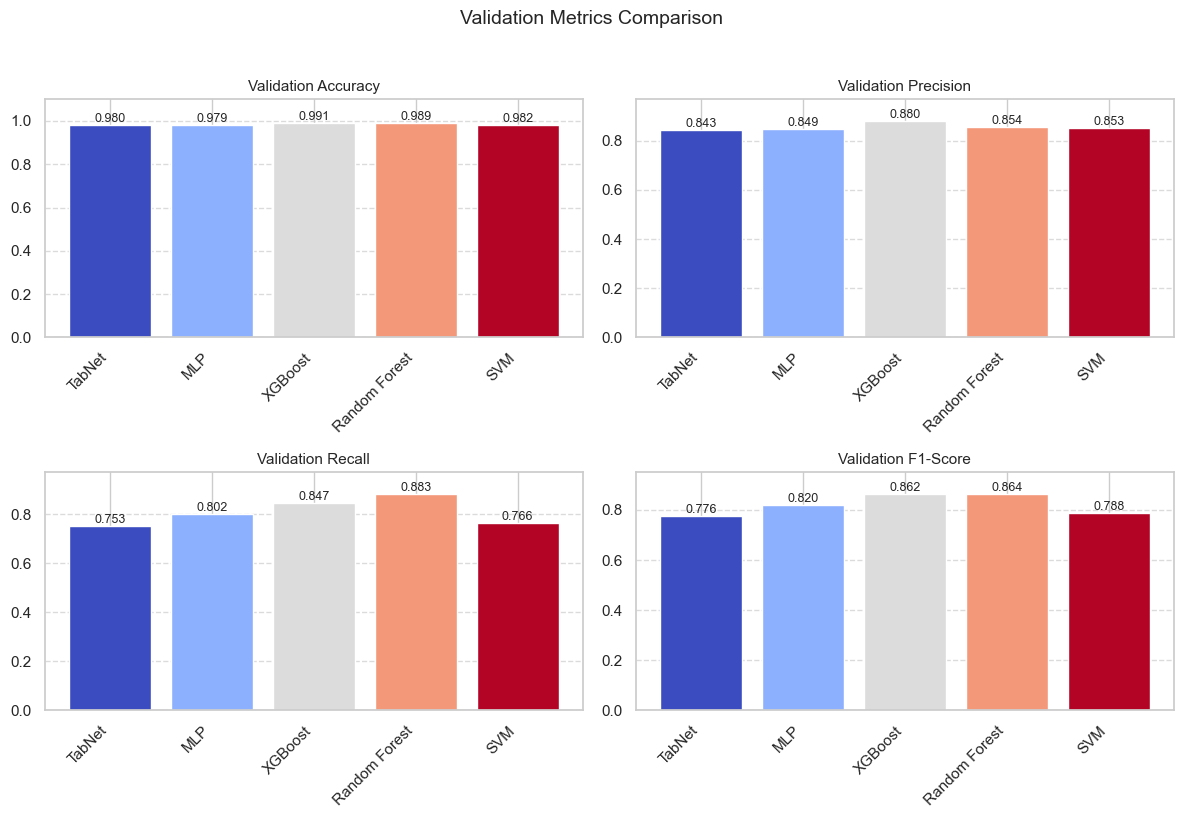

In [74]:
plt.figure(figsize=(12, 8))

# Validation metrics
val_metrics = [
    ('Validation Accuracy', val_accuracies),
    ('Validation Precision', val_precisions),
    ('Validation Recall', val_recalls),
    ('Validation F1-Score', val_f1s)
]

# Create subplots
for i, (metric_name, values) in enumerate(val_metrics, 1):
    plt.subplot(2, 2, i)
    bars = plt.bar(models, values, color=plt.cm.coolwarm(np.linspace(0, 1, len(models))))
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)
    
    plt.title(metric_name, fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.1 if 'Accuracy' in metric_name else max(values)*1.1)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Validation Metrics Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

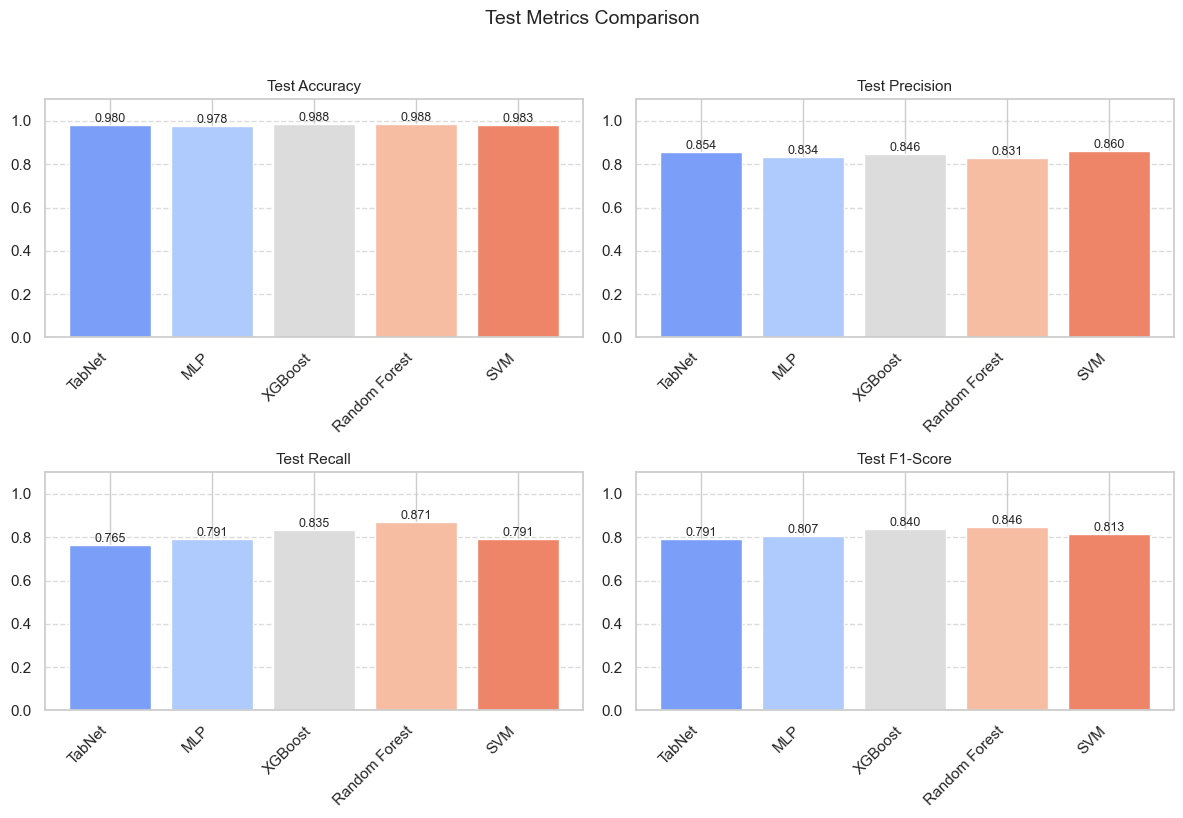

In [75]:
plt.figure(figsize=(12, 8))

# Test metrics
test_metrics = [
    ('Test Accuracy', test_accuracies),
    ('Test Precision', test_precisions),
    ('Test Recall', test_recalls),
    ('Test F1-Score', test_f1s)
]

# Create subplots
for i, (metric_name, values) in enumerate(test_metrics, 1):
    plt.subplot(2, 2, i)
    bars = plt.bar(models, values, color=plt.cm.coolwarm(np.linspace(0.2, 0.8, len(models))))  # Different color range
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)
    
    plt.title(metric_name, fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.1)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Test Metrics Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

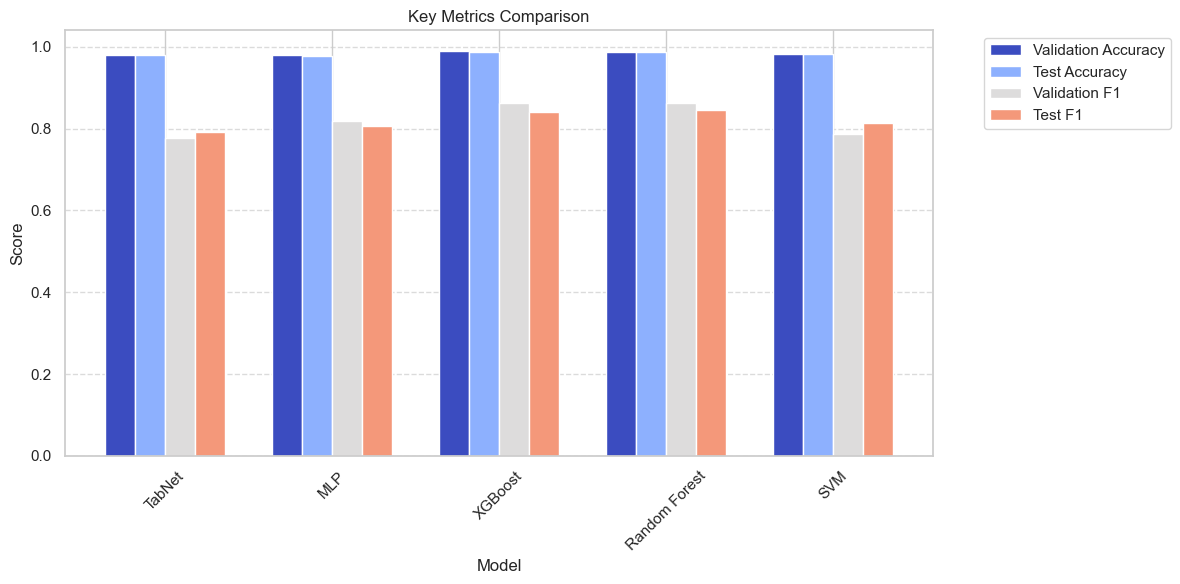

In [72]:
plt.figure(figsize=(12, 6))

# Select key metrics to compare
key_metrics = [
    ('Validation Accuracy', val_accuracies),
    ('Test Accuracy', test_accuracies),
    ('Validation F1', val_f1s),
    ('Test F1', test_f1s)
]

x = np.arange(len(models))
width = 0.18  # Adjusted for 4 metrics

for i, (metric_name, values) in enumerate(key_metrics):
    plt.bar(x + i*width, values, width, 
            label=metric_name,
            color=plt.cm.coolwarm(i/len(key_metrics)))
    
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Key Metrics Comparison')
plt.xticks(x + width*1.5, models, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Stacking 

In [ ]:
from xgboost import XGBClassifier

# Redefine XGBClassifier for stacking (no early stopping)
xgb_stacking = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',
    num_class=6,
    eval_metric='mlogloss',
    random_state=42,
    verbosity=0  
)


In [ ]:
base_learners = [
    ('mlp', mlp),
    ('svm', svm),
    ('xgb', xgb_stacking),  
    ('rf', rf)
]


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold

# Meta-learner
meta_learner = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=True,  # Includes original features in meta-learner
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)


In [79]:
# Adjust labels for training
y_train_adj = y_train - 1

# Fit the stacking ensemble
stacking_clf.fit(X_train_scaled, y_train_adj)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('mlp',
                                MLPClassifier(early_stopping=True,
                                              hidden_layer_sizes=(128, 64),
                                              max_iter=500, random_state=42,
                                              verbose=True)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=N...
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=1000, n_jobs=None,
                                              num_class=6, ...)),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=500,
                                                       n_jobs=-1,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      multi_class='multinomial',
                                                      random_state=42),
                   n_jobs=-1, passthrough=True, verbose=1)

In [80]:
# Predict on validation set
y_val_pred_stack = stacking_clf.predict(X_val_scaled) + 1  # Back to 1–6

# Predict on test set
y_test_pred_stack = stacking_clf.predict(X_test_scaled) + 1


In [81]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (Macro): {precision:.4f}")
    print(f"Recall (Macro): {recall:.4f}")
    print(f"F1 Score (Macro): {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate on validation
evaluate_model("Stacking Classifier (Validation)", y_val, y_val_pred_stack)

# Evaluate on test
evaluate_model("Stacking Classifier (Test)", y_test, y_test_pred_stack)



Stacking Classifier (Validation) Evaluation Metrics:
Accuracy: 0.9910
Precision (Macro): 0.8818
Recall (Macro): 0.8458
F1 Score (Macro): 0.8616

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5024
           2       1.00      1.00      1.00      2709
           3       1.00      1.00      1.00       868
           4       0.94      0.97      0.95       619
           5       0.58      0.50      0.54        88
           6       0.78      0.61      0.68        46

    accuracy                           0.99      9354
   macro avg       0.88      0.85      0.86      9354
weighted avg       0.99      0.99      0.99      9354


Stacking Classifier (Test) Evaluation Metrics:
Accuracy: 0.9892
Precision (Macro): 0.8470
Recall (Macro): 0.8333
F1 Score (Macro): 0.8397

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5025
           2  

In [82]:
meta_lr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)


In [83]:
meta_xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    objective='multi:softmax',
    num_class=6,
    eval_metric='mlogloss',
    random_state=42,
    verbosity=0
)


In [ ]:
# Try both meta-learners
for name, meta in [('LogisticRegression', meta_lr), ('XGBoost', meta_xgb)]:
    print(f"\n--- Training with {name} as meta-learner ---")
    stack_model = StackingClassifier(
        estimators=base_learners,
        final_estimator=meta,
        passthrough=True,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
        verbose=0
    )
    stack_model.fit(X_train_scaled, y_train - 1)
    y_val_pred = stack_model.predict(X_val_scaled) + 1
    y_test_pred = stack_model.predict(X_test_scaled) + 1
    evaluate_model(f"Stacking with {name} (Validation)", y_val, y_val_pred)
    evaluate_model(f"Stacking with {name} (Test)", y_test, y_test_pred)



--- Training with LogisticRegression as meta-learner ---


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Stacking with LogisticRegression (Validation) Evaluation Metrics:
Accuracy: 0.9910
Precision (Macro): 0.8818
Recall (Macro): 0.8458
F1 Score (Macro): 0.8616

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5024
           2       1.00      1.00      1.00      2709
           3       1.00      1.00      1.00       868
           4       0.94      0.97      0.95       619
           5       0.58      0.50      0.54        88
           6       0.78      0.61      0.68        46

    accuracy                           0.99      9354
   macro avg       0.88      0.85      0.86      9354
weighted avg       0.99      0.99      0.99      9354


Stacking with LogisticRegression (Test) Evaluation Metrics:
Accuracy: 0.9892
Precision (Macro): 0.8470
Recall (Macro): 0.8333
F1 Score (Macro): 0.8397

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.0

C:\Users\USER\AppData\Local\Temp\ipykernel_9812\699686790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_9812\699686790.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="rocket")


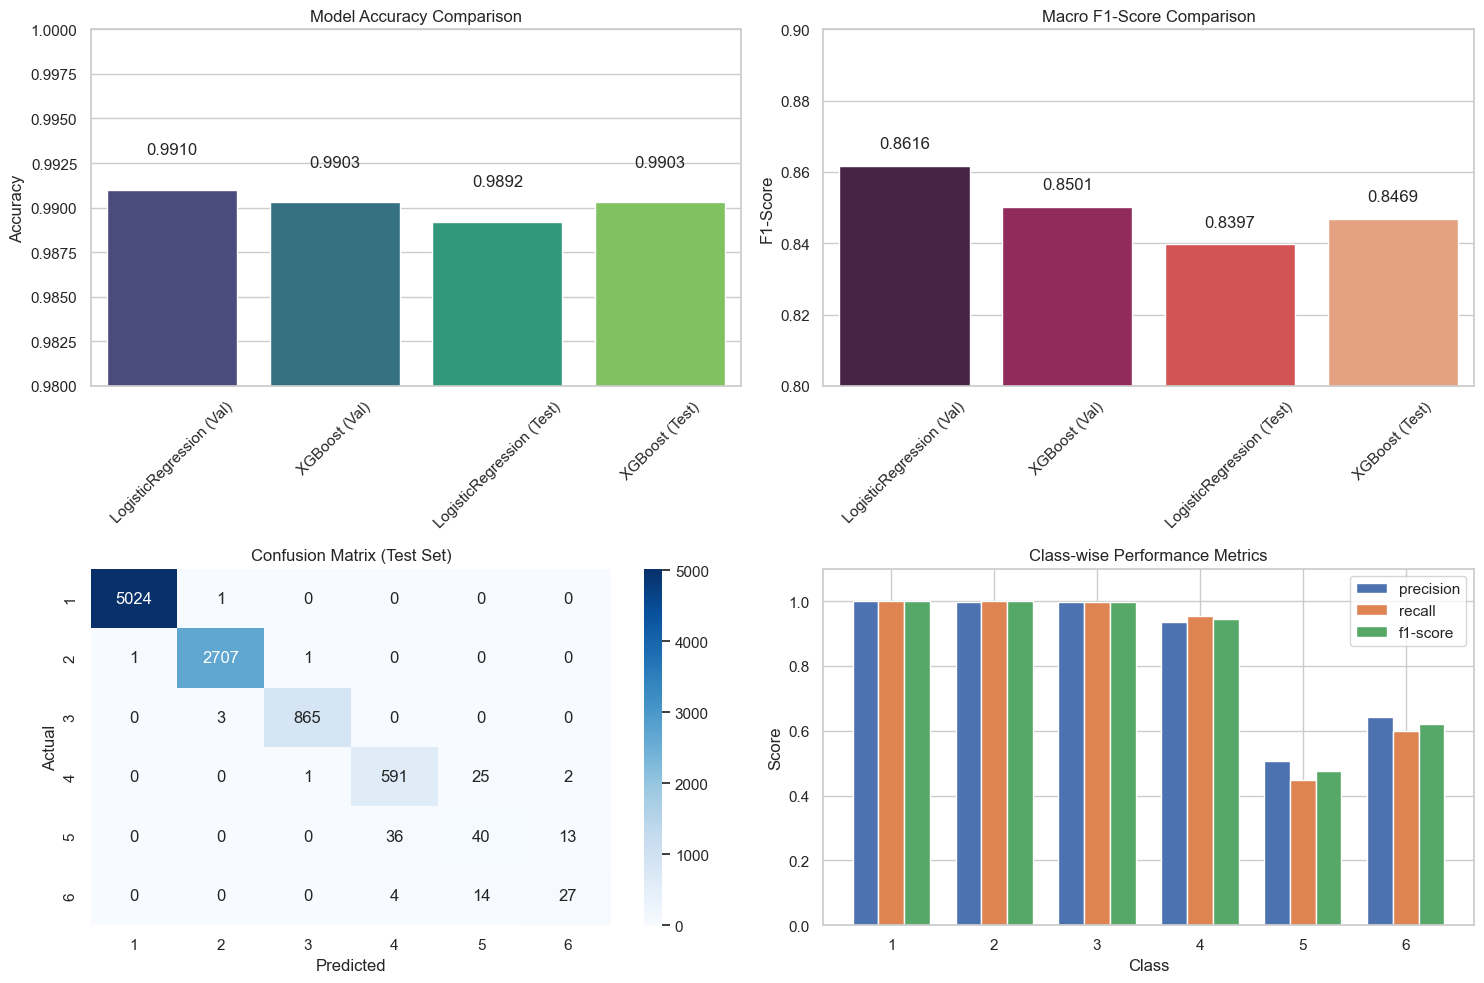

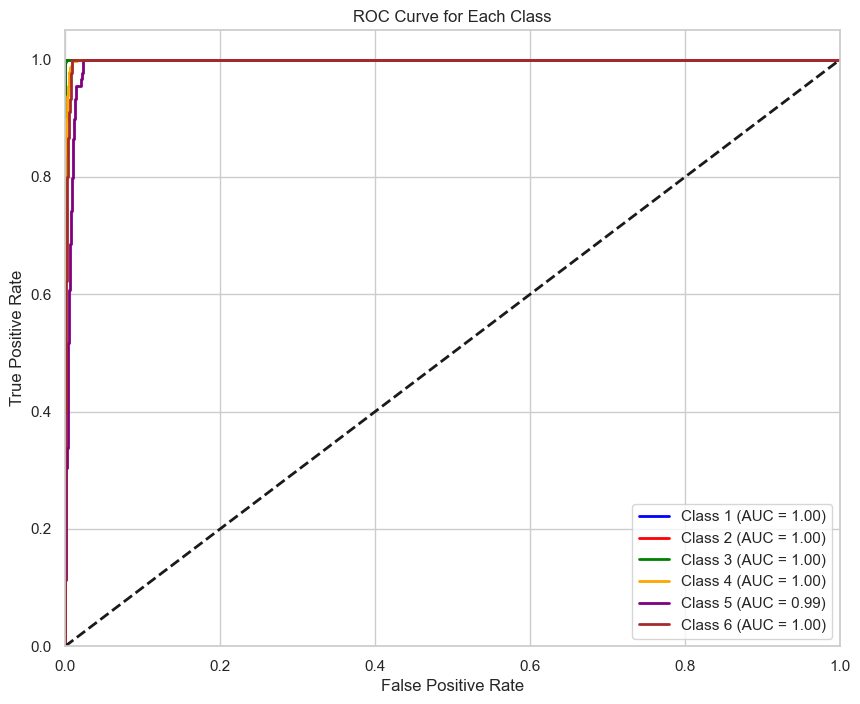

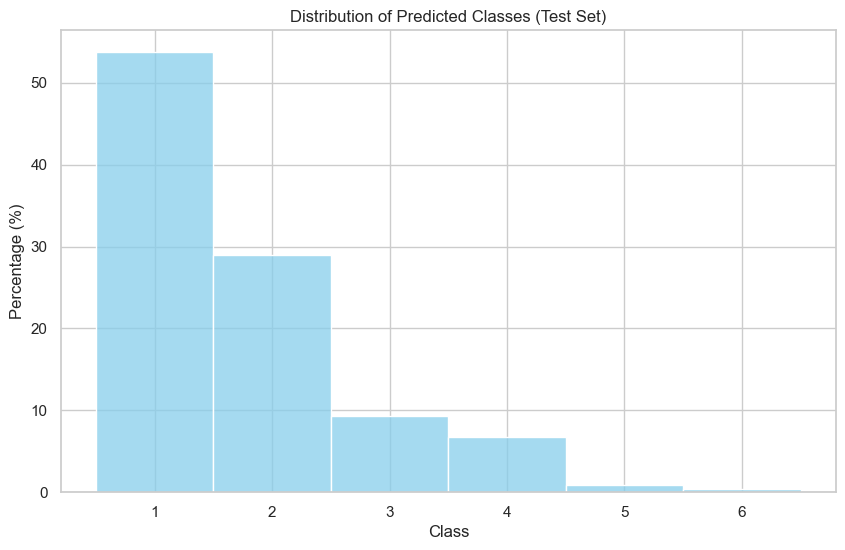

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Accuracy Comparison Bar Plot
models = ['LogisticRegression (Val)', 'XGBoost (Val)', 'LogisticRegression (Test)', 'XGBoost (Test)']
accuracies = [0.9910, 0.9903, 0.9892, 0.9903]

plt.subplot(2, 2, 1)
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.98, 1.0)
plt.xticks(rotation=45)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center')

# Macro F1-Score Comparison
f1_scores = [0.8616, 0.8501, 0.8397, 0.8469]

plt.subplot(2, 2, 2)
sns.barplot(x=models, y=f1_scores, palette="rocket")
plt.title("Macro F1-Score Comparison")
plt.ylabel("F1-Score")
plt.ylim(0.8, 0.9)
plt.xticks(rotation=45)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')

# Confusion Matrix (Using LogisticRegression meta-learner test results)
plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test, y_test_pred_stack)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Class-wise Performance
class_report = classification_report(y_test, y_test_pred_stack, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_data = {m: [class_report[str(i)][m] for i in range(1,7)] for m in metrics}

plt.subplot(2, 2, 4)
x = np.arange(6)  # 6 classes
width = 0.25
for i, (metric, values) in enumerate(class_data.items()):
    plt.bar(x + i*width, values, width, label=metric)
plt.xticks(x + width, labels=range(1,7))
plt.title("Class-wise Performance Metrics")
plt.xlabel("Class")
plt.ylabel("Score")
plt.legend()
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()


# ROC Curve (for multiclass)
plt.figure(figsize=(10, 8))
y_test_bin = label_binarize(y_test, classes=[1,2,3,4,5,6])
y_score = stacking_clf.predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

# Feature Importance from Meta-Learner (LogisticRegression)
if hasattr(meta_lr, 'coef_'):
    plt.figure(figsize=(12, 6))
    # Get number of features from base learners + original features
    n_features = meta_lr.coef_.shape[1]
    feature_names = [f'Base_{i}' for i in range(n_features - X_train_scaled.shape[1])] + \
                   [f'Orig_{i}' for i in range(X_train_scaled.shape[1])]
    
    # Average importance across all classes
    avg_importance = np.mean(np.abs(meta_lr.coef_), axis=0)
    sorted_idx = np.argsort(avg_importance)[-20:]  # Show top 20
    sns.barplot(x=avg_importance[sorted_idx], y=np.array(feature_names)[sorted_idx])
    plt.title("Average Feature Importance from LogisticRegression Meta-Learner")
    plt.xlabel("Mean Absolute Coefficient")
    plt.tight_layout()
    plt.show()

# Prediction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_test_pred_stack, bins=6, discrete=True, stat='percent', color='skyblue')
plt.title("Distribution of Predicted Classes (Test Set)")
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.xticks(range(1,7))
plt.show()

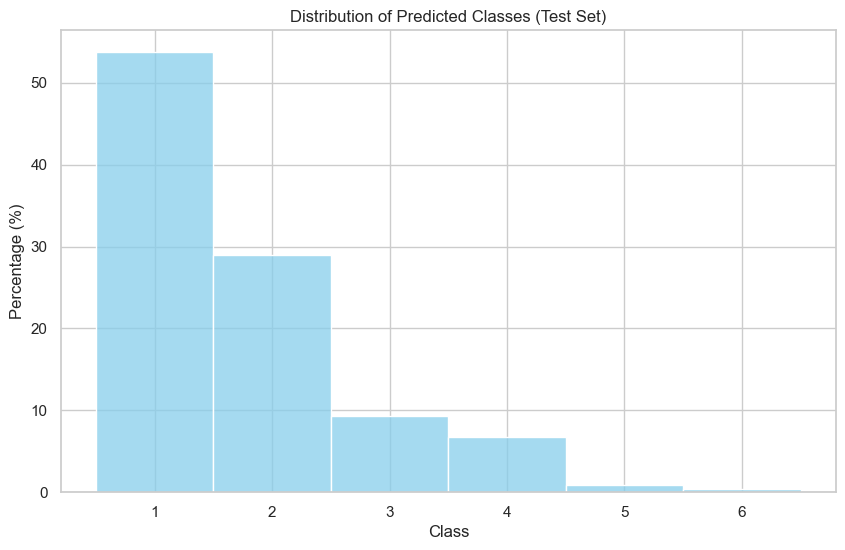

In [ ]:

# Prediction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_test_pred_stack, bins=6, discrete=True, stat='percent', color='skyblue')
plt.title("Distribution of Predicted Classes (Test Set)")
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.xticks(range(1,7))
plt.show()

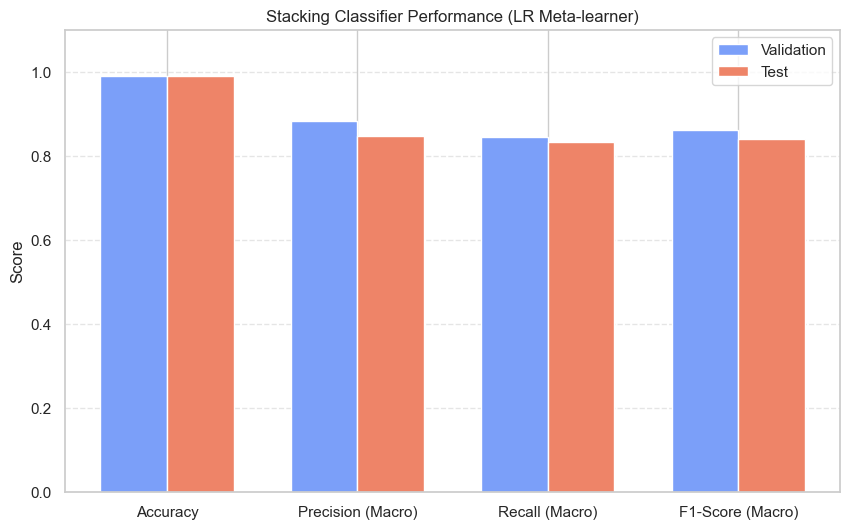

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Performance Metrics Comparison
metrics = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']
val_scores = [accuracy_score(y_val, y_val_pred_stack), 
              *precision_recall_fscore_support(y_val, y_val_pred_stack, average='macro')[:3]]
test_scores = [accuracy_score(y_test, y_test_pred_stack), 
               *precision_recall_fscore_support(y_test, y_test_pred_stack, average='macro')[:3]]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, val_scores, width, label='Validation', color=plt.cm.coolwarm(0.2))
plt.bar(x + width/2, test_scores, width, label='Test', color=plt.cm.coolwarm(0.8))
plt.title('Stacking Classifier Performance (LR Meta-learner)')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


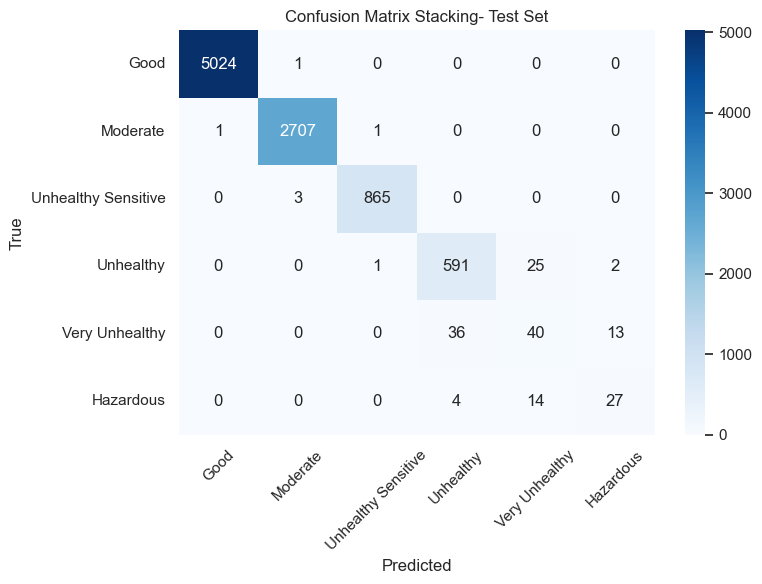

In [ ]:
# Confusion Matrix 
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_stack)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Moderate', 'Unhealthy Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'],
            yticklabels=['Good', 'Moderate', 'Unhealthy Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.title('Confusion Matrix Stacking- Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()